In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import pi

In [62]:
standard_stats = pd.read_csv(r"C:\Users\hp\Desktop\Football Project\Liverpool\Standard Stats.csv", sep=';')
scores_fixtures = pd.read_csv(r"C:\Users\hp\Desktop\Football Project\Liverpool\scores & fixtures.csv", sep=';')
goalkeeping = pd.read_csv(r"C:\Users\hp\Desktop\Football Project\Liverpool\Goalkeeping.csv", sep=';')
advanced_goalkeeping = pd.read_csv(r"C:\Users\hp\Desktop\Football Project\Liverpool\Advanced Goalkeeping.csv", sep=';')
shooting = pd.read_csv(r"C:\Users\hp\Desktop\Football Project\Liverpool\Shooting.csv", sep=';')
passing = pd.read_csv(r"C:\Users\hp\Desktop\Football Project\Liverpool\Passing.csv", sep=';')
possession = pd.read_csv(r"C:\Users\hp\Desktop\Football Project\Liverpool\Possession.csv", sep=';')
defensive_actions = pd.read_csv(r"C:\Users\hp\Desktop\Football Project\Liverpool\Defensive Actions.csv", sep=';')
goal_shot_creation = pd.read_csv(r"C:\Users\hp\Desktop\Football Project\Liverpool\Goal and Shot Creation.csv", sep=';')
playing_time = pd.read_csv(r"C:\Users\hp\Desktop\Football Project\Liverpool\Playing Time.csv", sep=';')
misc_stats = pd.read_csv(r"C:\Users\hp\Desktop\Football Project\Liverpool\Miscellaneous Stats.csv", sep=';')

In [35]:
#Liverpool Current Season
total_matches = len(scores_fixtures)
wins = (scores_fixtures['GF'] > scores_fixtures['GA']).sum()
draws = (scores_fixtures['GF'] == scores_fixtures['GA']).sum()
losses = (scores_fixtures['GF'] < scores_fixtures['GA']).sum()
total_goals_for = scores_fixtures['GF'].sum()
total_goals_against = scores_fixtures['GA'].sum()

print(f"Total Matches: {total_matches}")
print(f"Wins: {wins}")
print(f"Draws: {draws}")
print(f"Losses: {losses}")
print(f"Total Goals For: {total_goals_for}")
print(f"Total Goals Against: {total_goals_against}")

Total Matches: 3
Wins: 3
Draws: 0
Losses: 0
Total Goals For: 7
Total Goals Against: 0


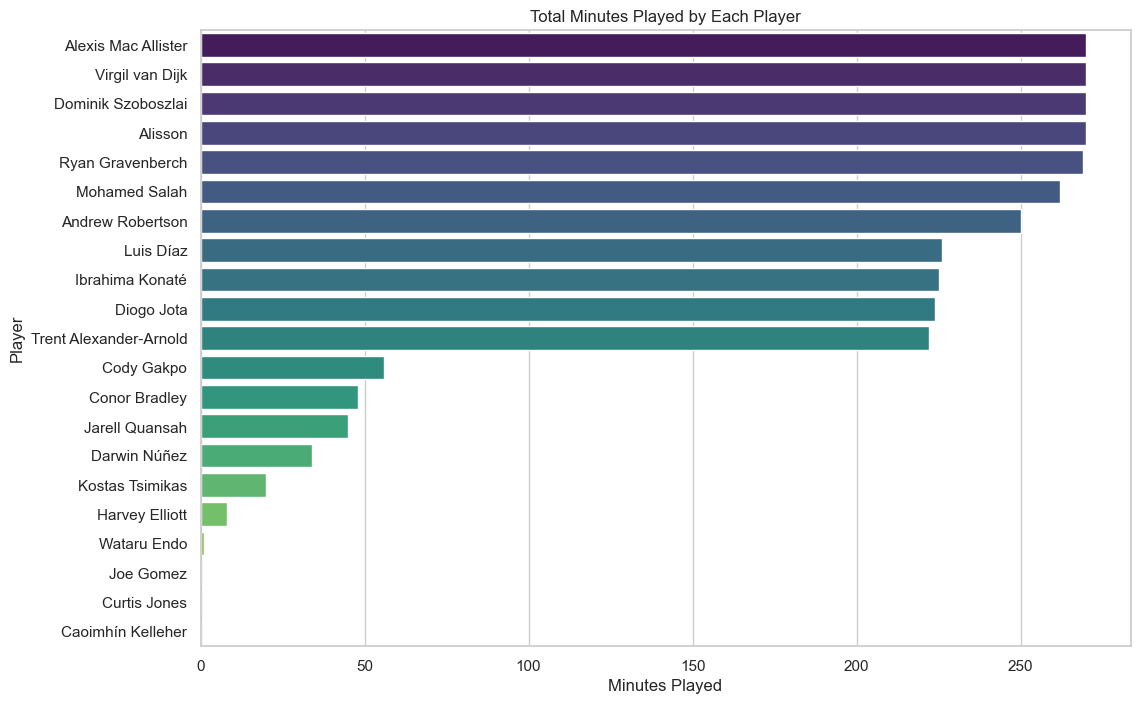

In [42]:
#extracting players that played the most
minutes_played = standard_stats.groupby('Player')['Min'].sum()

top_minutes_played = minutes_played.sort_values(ascending=False)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x=top_minutes_played.values, y=top_minutes_played.index, palette="viridis")
plt.title('Total Minutes Played by Each Player')
plt.xlabel('Minutes Played')
plt.ylabel('Player')
plt.show()


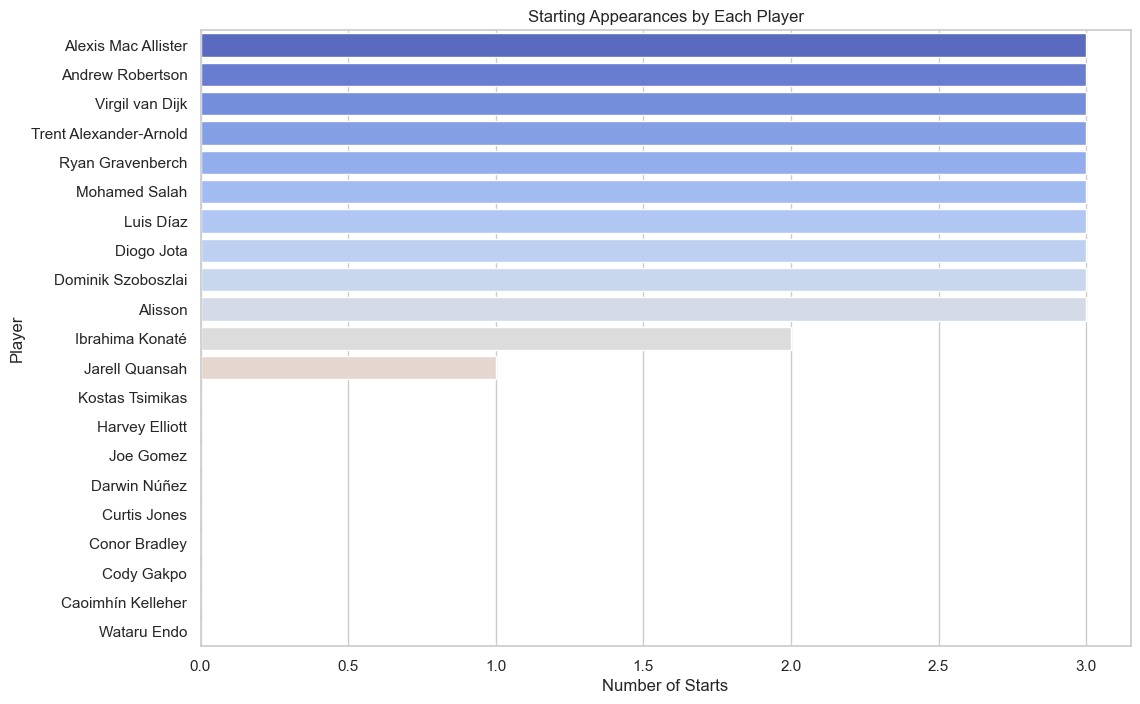

In [43]:
#extracting players that started the most
starting_appearances = standard_stats.groupby('Player')['Starts'].sum()

top_starters = starting_appearances.sort_values(ascending=False)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x=top_starters.values, y=top_starters.index, palette="coolwarm")
plt.title('Starting Appearances by Each Player')
plt.xlabel('Number of Starts')
plt.ylabel('Player')
plt.show()

                                           Min  Gls  Ast   xG  Gls/90  Ast/90  \
                 Player                                                         
Regular Starters Alexis Mac Allister     270.0  0.0  0.0  0.1    0.00    0.00   
                 Alisson                 270.0  0.0  0.0  0.0    0.00    0.00   
                 Andrew Robertson        250.0  0.0  0.0  0.3    0.00    0.00   
                 Diogo Jota              224.0  1.0  1.0  1.6    0.40    0.40   
                 Dominik Szoboszlai      270.0  0.0  1.0  0.3    0.00    0.33   
                 Ibrahima Konaté         225.0  0.0  0.0  0.2    0.00    0.00   
                 Luis Díaz               226.0  3.0  1.0  1.8    1.19    0.40   
                 Mohamed Salah           262.0  3.0  3.0  1.8    1.03    1.03   
                 Ryan Gravenberch        269.0  0.0  0.0  0.0    0.00    0.00   
                 Trent Alexander-Arnold  222.0  0.0  0.0  0.2    0.00    0.00   
                 Virgil van 

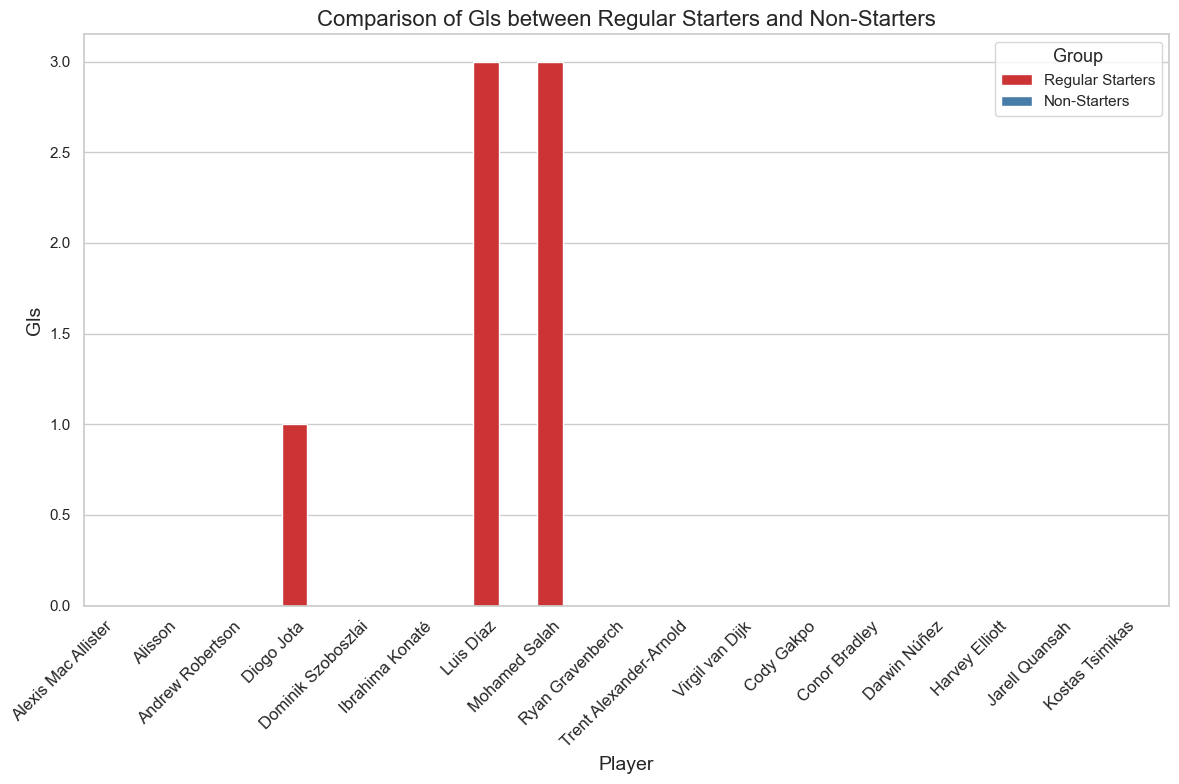

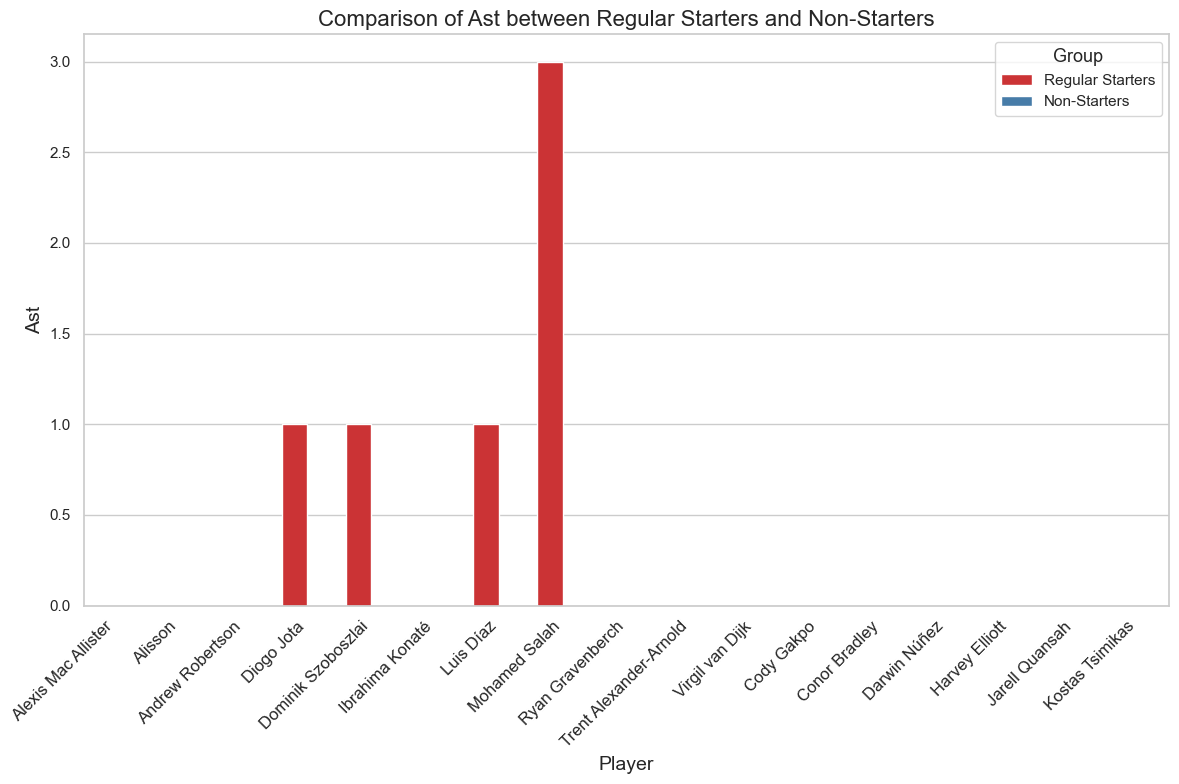

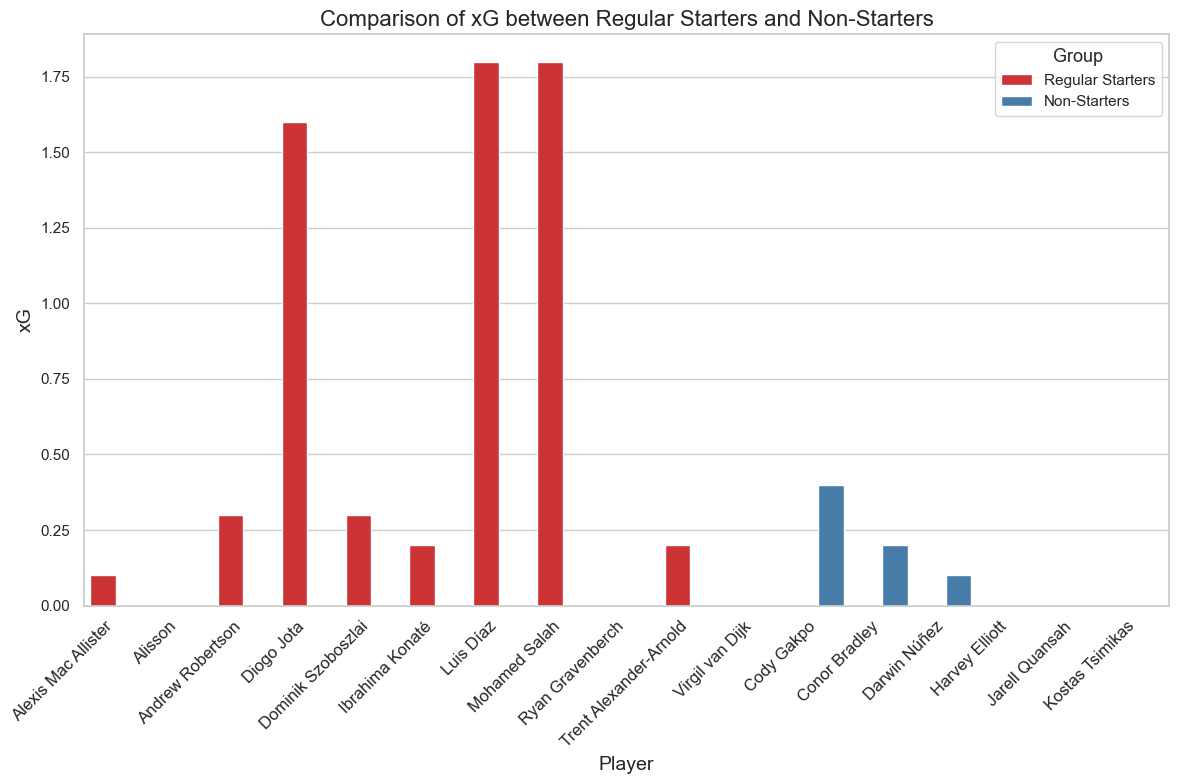

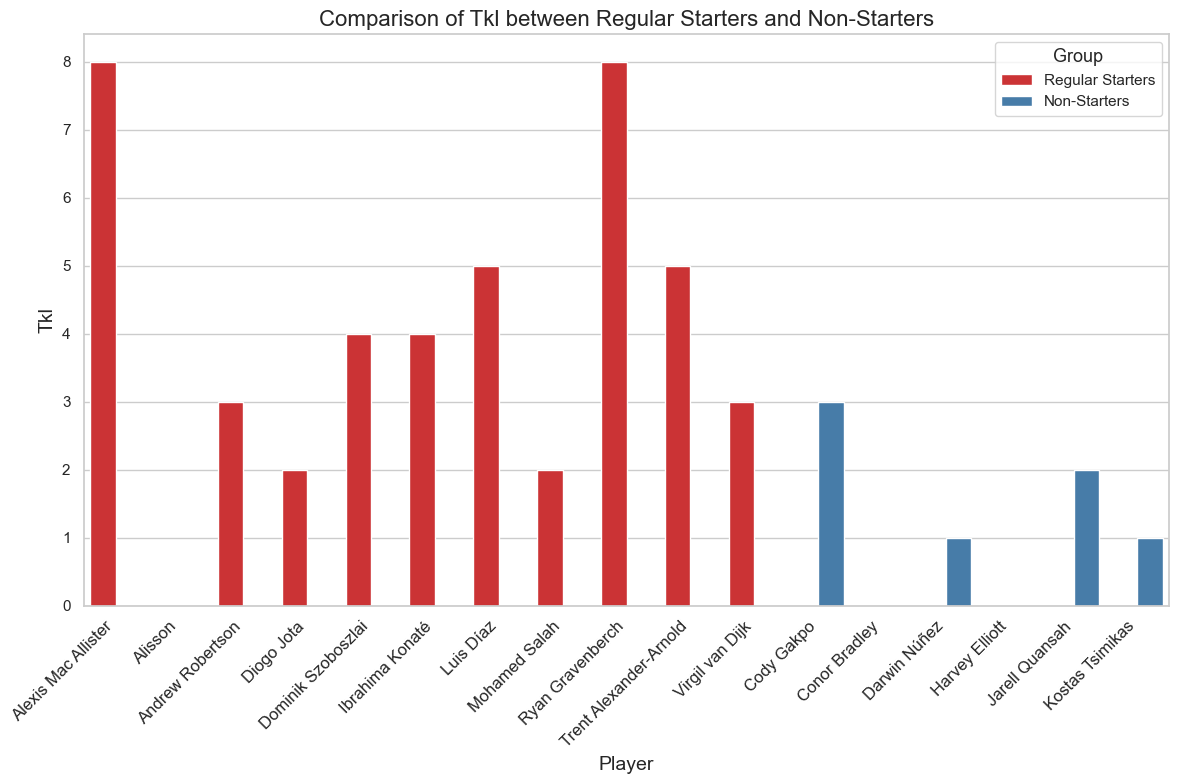

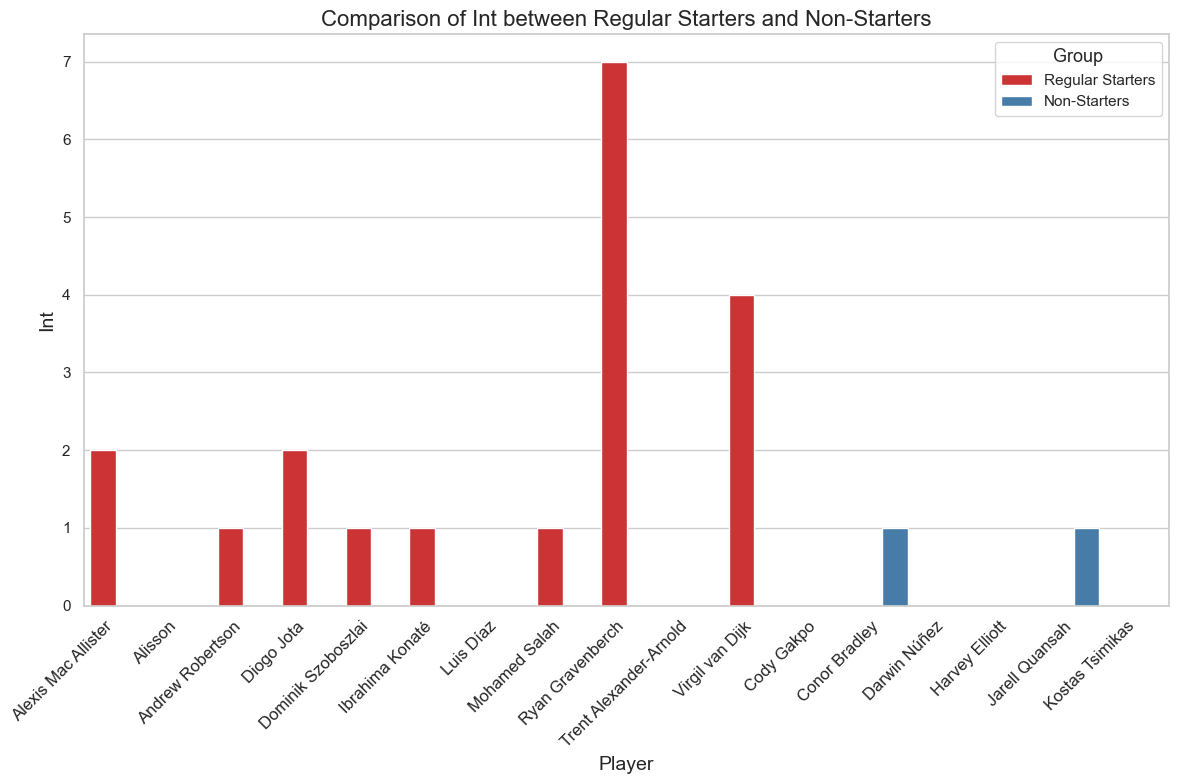

In [63]:
#Performance Metrics of Regular Starters vs. Non-Starters

kpi_columns = ['Player', 'Min', 'Gls', 'Ast', 'xG', 'Gls/90', 'Ast/90', 'xG/90']
kpi_stats = standard_stats[kpi_columns]

defensive_columns = ['Player', 'Tkl', 'Int']
defensive_stats = defensive_actions[defensive_columns]

combined_stats = pd.merge(kpi_stats, defensive_stats, on='Player')

regular_starters = ['Alexis Mac Allister', 'Andrew Robertson', 'Virgil van Dijk', 'Trent Alexander-Arnold', 'Ryan Gravenberch', 'Mohamed Salah', 'Luis Díaz', 'Diogo Jota', 'Dominik Szoboszlai', 'Alisson', 'Ibrahima Konaté']
non_starters = ['Jarell Quansah', 'Kostas Tsimikas', 'Harvey Elliott', 'Joe Gomez', 'Darwin Núñez', 'Curtis Jones', 'Conor Bradley', 'Cody Gakpo', 'Caoimhín Kelleher']

regular_starters_data = combined_stats[combined_stats['Player'].isin(regular_starters)]
non_starters_data = combined_stats[combined_stats['Player'].isin(non_starters)]

regular_starters_metrics = regular_starters_data.groupby('Player').mean()
non_starters_metrics = non_starters_data.groupby('Player').mean()

comparison_metrics = pd.concat([regular_starters_metrics, non_starters_metrics], keys=['Regular Starters', 'Non-Starters'])
print(comparison_metrics)

#Vizualization of Performance Metrics of Regular Starters vs. Non-Starters

def plot_kpi_comparison(df, metric):
    # Reset index for proper plotting
    df_reset = df.reset_index()
    
    plt.figure(figsize=(12, 8))
    
    sns.barplot(data=df_reset, x='Player', y=metric, hue='level_0', palette='Set1')

    plt.title(f'Comparison of {metric} between Regular Starters and Non-Starters', fontsize=16)
    plt.ylabel(metric, fontsize=14)
    plt.xlabel('Player', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate and align x labels
    plt.legend(title='Group', title_fontsize='13', fontsize='11')
    plt.tight_layout()  # Adjust layout to fit labels
    
    plt.show()

metrics = ['Gls', 'Ast', 'xG', 'Tkl', 'Int']
for metric in metrics:
    plot_kpi_comparison(comparison_metrics[metric], metric)

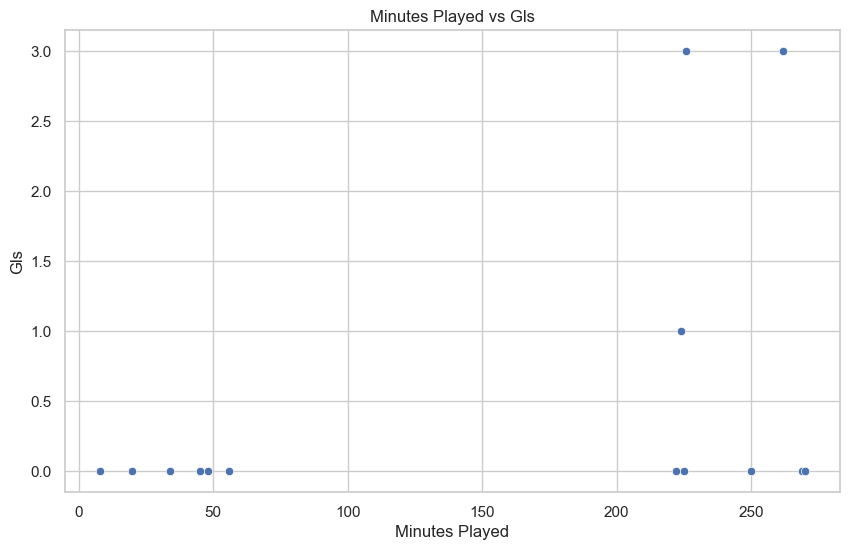

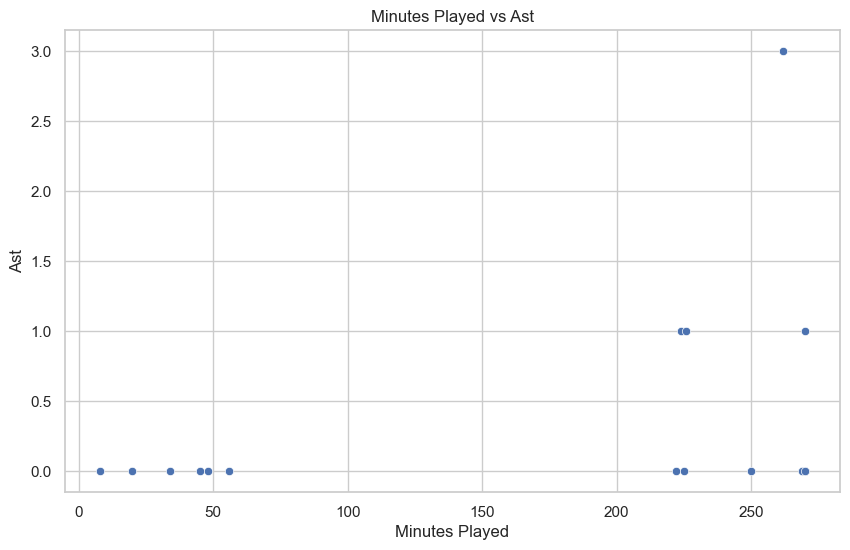

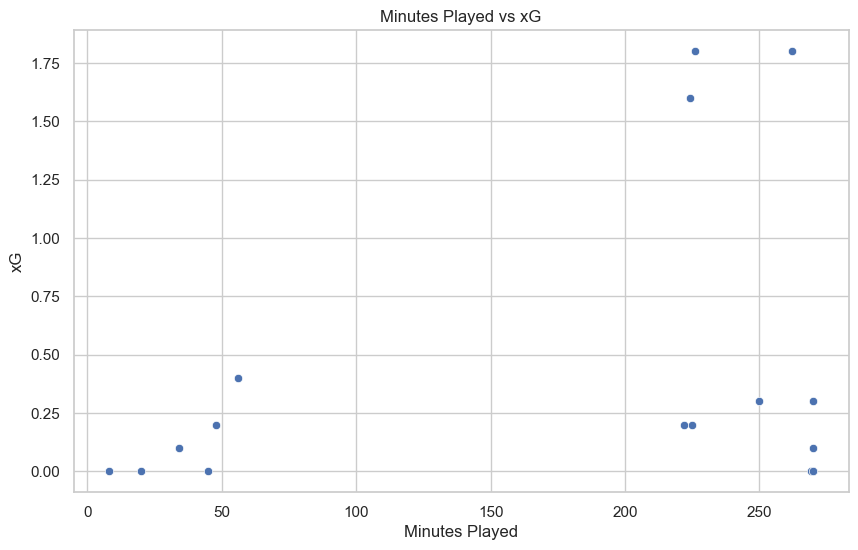

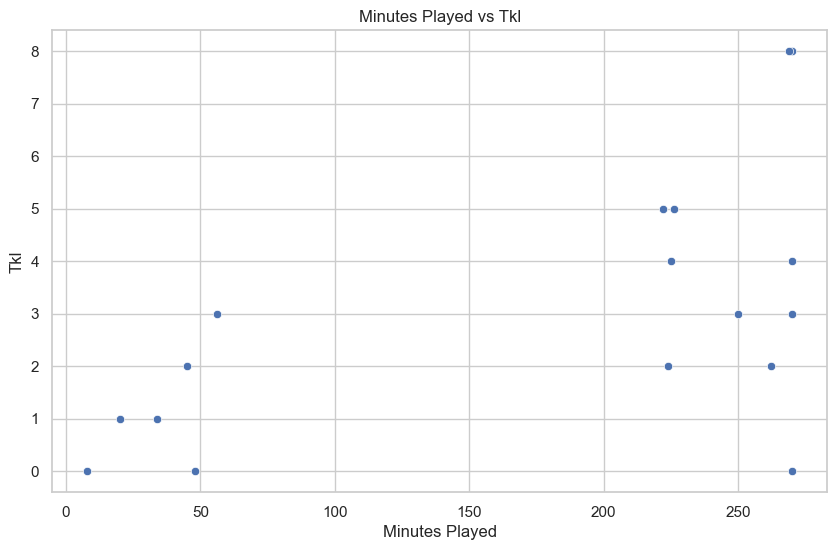

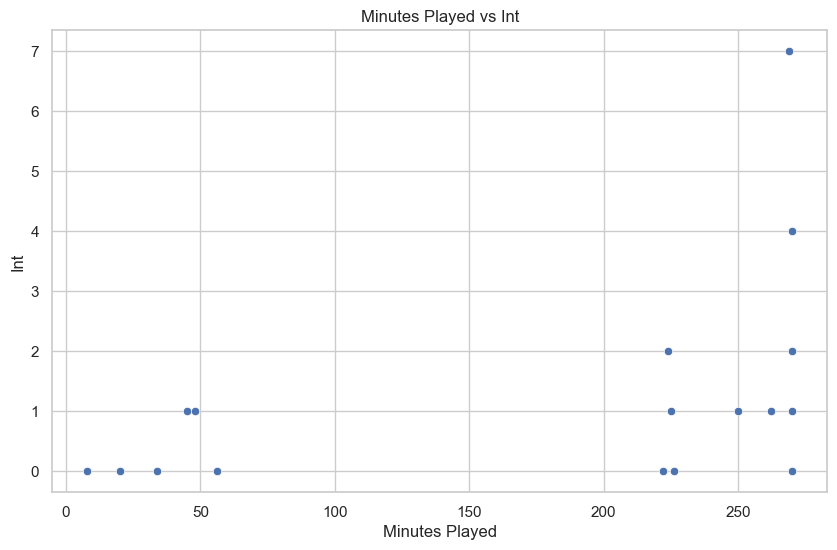

In [45]:
#Minutes Played vs. Performance Metrics: Correlation Analysis
def plot_correlation(df, metric):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Min', y=metric)
    plt.title(f'Minutes Played vs {metric}')
    plt.xlabel('Minutes Played')
    plt.ylabel(metric)
    plt.show()

performance_metrics = ['Gls', 'Ast', 'xG', 'Tkl', 'Int']
for metric in performance_metrics:
    plot_correlation(comparison_metrics, metric)

In [46]:
#Most Used Team Formation
formation_counts = scores_fixtures['Formation'].value_counts()
print(formation_counts)

Formation
4-2-3-1    3
Name: count, dtype: int64


    Player  Save%    CS%
0  Alisson  100.0  100.0
    Player   /90  PSxG+/-  LaunchedPassesCmp%  GoalKicksLaunch%
0  Alisson  0.56      1.7           38.461538              37.5


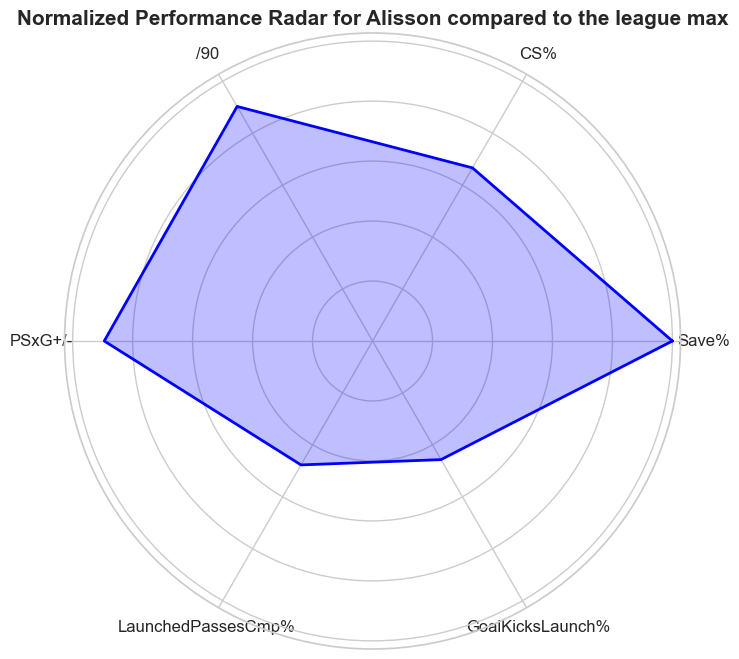

In [57]:
#GoalKeeper Analysis
print(goalkeeping[['Player', 'Save%', 'CS%']])
print(advanced_goalkeeping[['Player', '/90', 'PSxG+/-', 'LaunchedPassesCmp%', 'GoalKicksLaunch%']])

league_max = {
    'Save%': 100,
    'CS%': 150,
    '/90': 0.62,
    'PSxG+/-': 1.9,
    'LaunchedPassesCmp%': 80.6,
    'GoalKicksLaunch%': 82.1
}

# Merge the DataFrames on 'Player'
combined = pd.merge(goalkeeping, advanced_goalkeeping, on='Player')

# Normalize the data for the metrics defined in league_max
combined_normalized = combined.copy()
for metric in league_max:
    if metric in combined.columns:
        combined_normalized[metric] = combined[metric] / league_max[metric]
        
def create_radar_chart(player_stats, player_name, metrics):
    # Filter metrics
    categories = [metric for metric in metrics if metric in player_stats.index]
    values = [player_stats[metric] for metric in categories]
    
    num_vars = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    values += values[:1]  # Complete the loop for radar chart
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12, rotation=45)
    plt.title(f"Normalized Performance Radar for {player_name} compared to the League Max", size=15, weight='bold')
    plt.show()

# Plot radar chart
player = combined['Player'].iloc[0]  # Get the single player's name

# Fetch and normalize the player's stats
player_stats = combined_normalized[combined_normalized['Player'] == player].iloc[0]
create_radar_chart(player_stats, player, list(league_max.keys()))

            Player  Tkl  Int  Clr  Blocks  Cmp%  PrgPasses  Aerial DuelsWon%  \
0  Virgil van Dijk    3    4   17       0  94.9        9.0              76.9   
1  Ibrahima Konaté    4    1   11       5  92.9       10.0              80.0   
2   Jarell Quansah    2    1    3       1  89.3        0.0              50.0   

   CrdY  CrdR  
0   1.0   0.0  
1   0.0   0.0  
2   0.0   0.0  


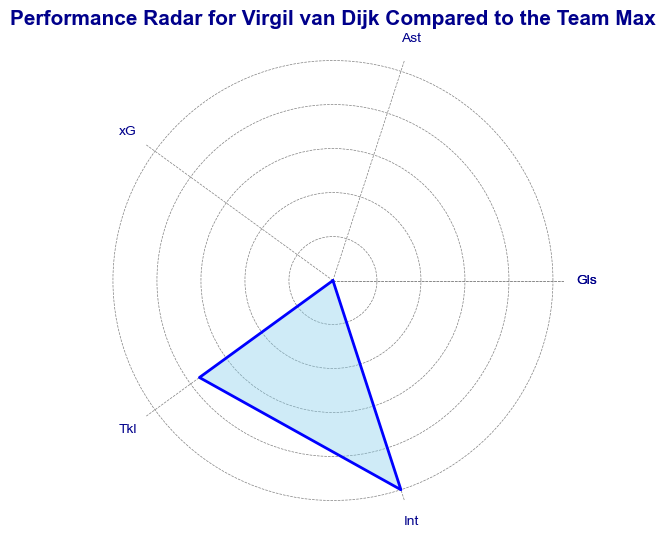

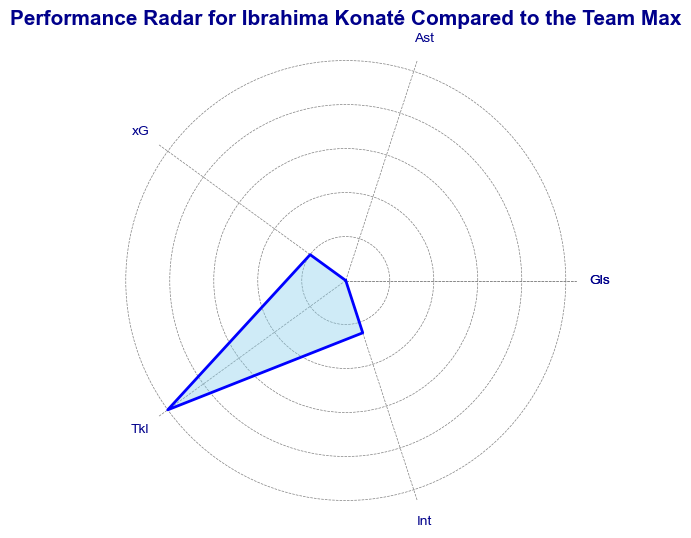

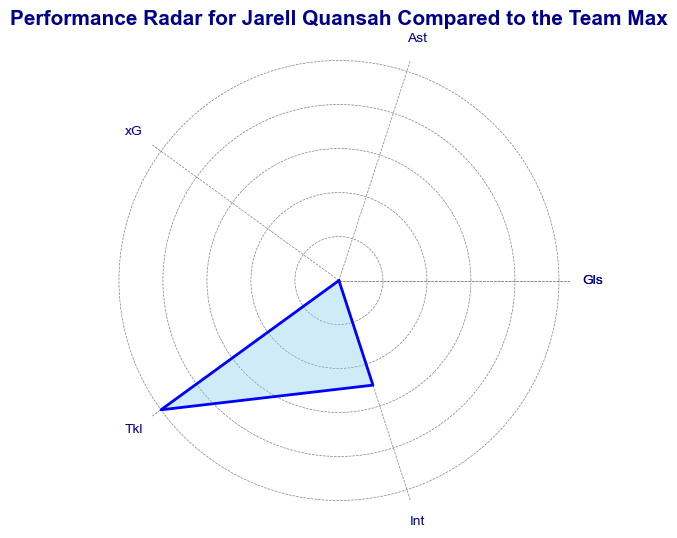

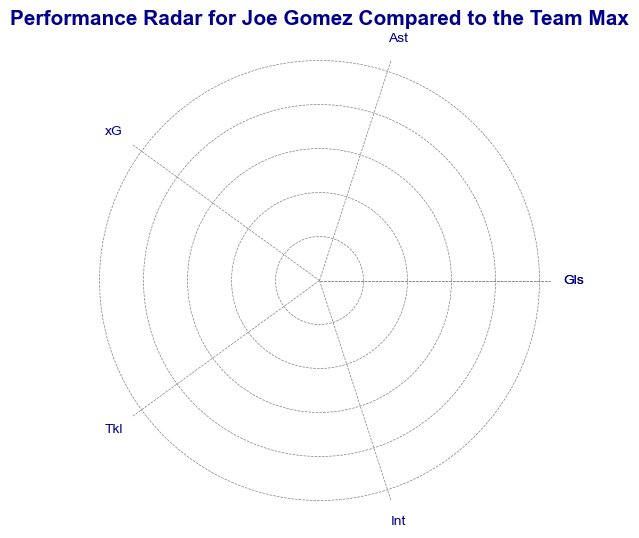

<Figure size 1000x600 with 0 Axes>

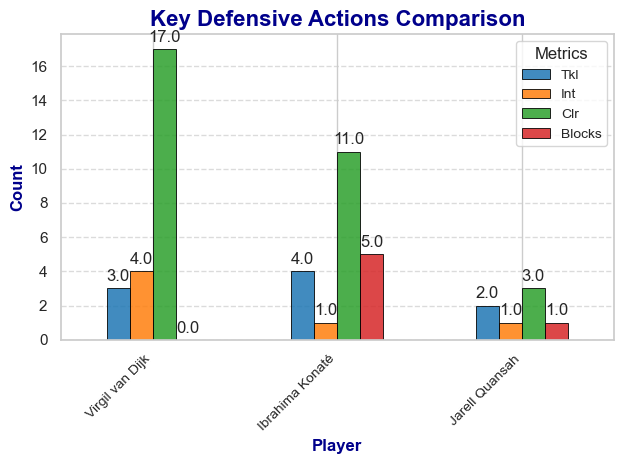

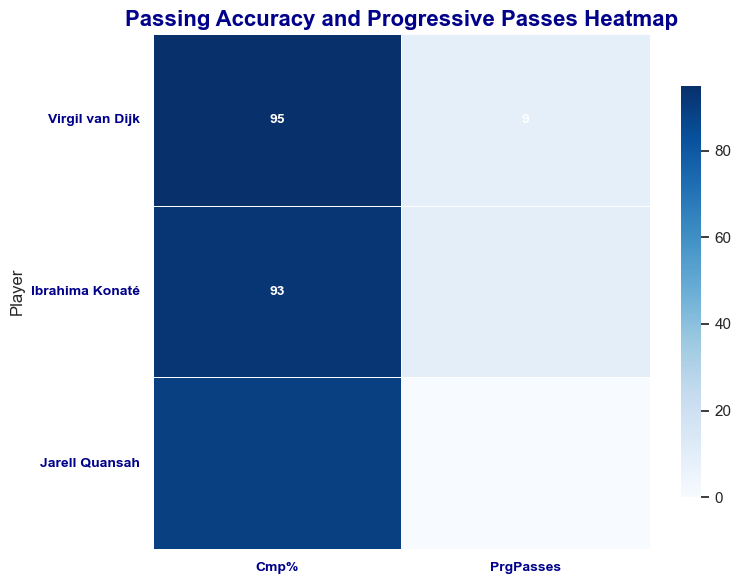

In [58]:
#Central Defenders Analysis

# Filter central defenders
central_defenders = ['Virgil van Dijk', 'Ibrahima Konaté', 'Jarell Quansah', 'Joe Gomez']
cd_standard_stats = standard_stats[standard_stats['Player'].isin(central_defenders)]
cd_defensive_actions = defensive_actions[defensive_actions['Player'].isin(central_defenders)]
cd_possession = possession[possession['Player'].isin(central_defenders)]
cd_passing = passing[passing['Player'].isin(central_defenders)]
cd_misc_stats = misc_stats[misc_stats['Player'].isin(central_defenders)]

# Merge all data into one DataFrame
cd_stats = pd.merge(cd_standard_stats, cd_defensive_actions, on='Player', suffixes=('', '_def'))
cd_stats = pd.merge(cd_stats, cd_possession, on='Player', suffixes=('', '_pos'))
cd_stats = pd.merge(cd_stats, cd_passing, on='Player', suffixes=('', '_pass'))
cd_stats = pd.merge(cd_stats, cd_misc_stats, on='Player', suffixes=('', '_misc'))


# Define metrics to normalize
cd_metrics = ['Tkl', 'Int', 'Clr', 'Blocks', 'Cmp%', 'PrgPasses', 'Aerial DuelsWon%', 'CrdY', 'CrdR']

# Normalization on team's Max
cd_stats_normalized = cd_stats.copy()

# Calculate the maximum value for each metric across all relevant DataFrames
for metric in cd_metrics:
    # Check if the metric exists in the columns
    if metric in cd_stats.columns:
        max_value = cd_stats[metric].max()
        if max_value > 0:  # Avoid division by zero
            cd_stats_normalized[metric] = cd_stats[metric] / max_value
        else:
            cd_stats_normalized[metric] = cd_stats[metric]  # Handle zero max value appropriately
    else:
        print(f"Metric {metric} not found in cd_stats columns")


print(cd_stats[['Player'] + cd_metrics])

# Individual Player Analysis using Radar Charts
def create_radar_chart(player_stats, player_name):
    categories = list(player_stats.index)
    values = player_stats.values.flatten().tolist()
    values += values[:1]  # Complete the loop for radar chart
    categories += categories[:1]  # Repeat the first category

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Improved design
    ax.fill(np.linspace(0, 2 * np.pi, len(values)), values, color='skyblue', alpha=0.4)
    ax.plot(np.linspace(0, 2 * np.pi, len(values)), values, color='blue', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(np.linspace(0, 2 * np.pi, len(values)))
    ax.set_xticklabels(categories, fontsize=10, color='darkblue')
    ax.spines['polar'].set_visible(False)
    ax.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.title(f"Performance Radar for {player_name} Compared to the Team Max", size=15, weight='bold', color='darkblue')
    
    plt.show()

# Plot radar chart for each central defender
for player in central_defenders:
    player_stats = cd_stats_normalized[cd_stats['Player'] == player][metrics].mean()
    create_radar_chart(player_stats, player)

# Bar Chart to Compare Players in Key Defensive Actions
plt.figure(figsize=(10, 6))
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Color palette
ax = cd_stats.set_index('Player')[['Tkl', 'Int', 'Clr', 'Blocks']].plot(
    kind='bar', 
    stacked=False, 
    color=bar_colors, 
    alpha=0.85,
    edgecolor='black',
    linewidth=0.7
)
ax.set_title("Key Defensive Actions Comparison", fontsize=16, weight='bold', color='darkblue')
ax.set_ylabel("Count", fontsize=12, weight='bold', color='darkblue')
ax.set_xlabel("Player", fontsize=12, weight='bold', color='darkblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.legend(title="Metrics", title_fontsize=12, fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

# Heatmap of Passing Accuracy and Progressive Passes
plt.figure(figsize=(8, 6))
sns.heatmap(
    cd_stats.set_index('Player')[['Cmp%', 'PrgPasses']], 
    annot=True, 
    cmap='Blues',  # Improved color palette
    linewidths=0.5, 
    linecolor='white', 
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 10, "weight": "bold", "color": "white"}
)
plt.title("Passing Accuracy and Progressive Passes Heatmap", fontsize=16, weight='bold', color='darkblue')
plt.yticks(rotation=0, fontsize=10, weight='bold', color='darkblue')
plt.xticks(fontsize=10, weight='bold', color='darkblue')
plt.tight_layout()
plt.show()



                   Player  Tkl  Int  Clr  Blocks  Cmp%  PrgPasses  Carries  \
0        Andrew Robertson    3    1    2       1  81.6       10.0      112   
1  Trent Alexander-Arnold    5    0    3       5  71.4       16.0       86   
2         Kostas Tsimikas    1    0    0       1  84.2        5.0       12   

   Crs  Take-OnsSucc  Aerial DuelsWon%  Ast  xAG  SCA  GCA  
0   19             1               0.0  0.0  0.4    8    0  
1   12             2               0.0  0.0  1.2   10    1  
2    0             0               NaN  0.0  0.0    1    0  


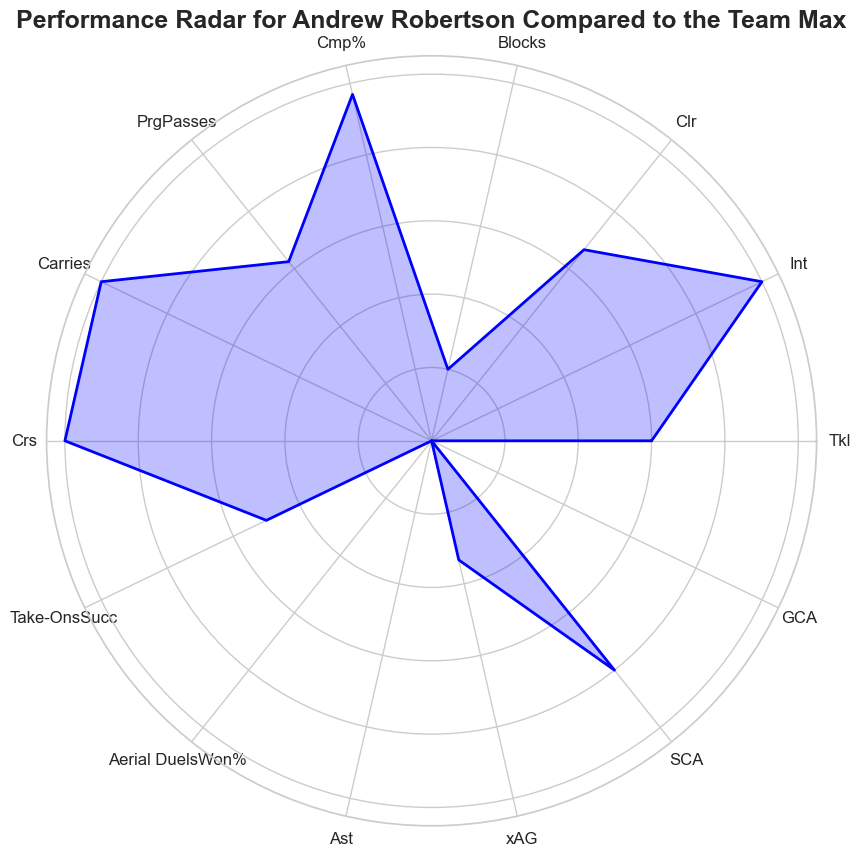

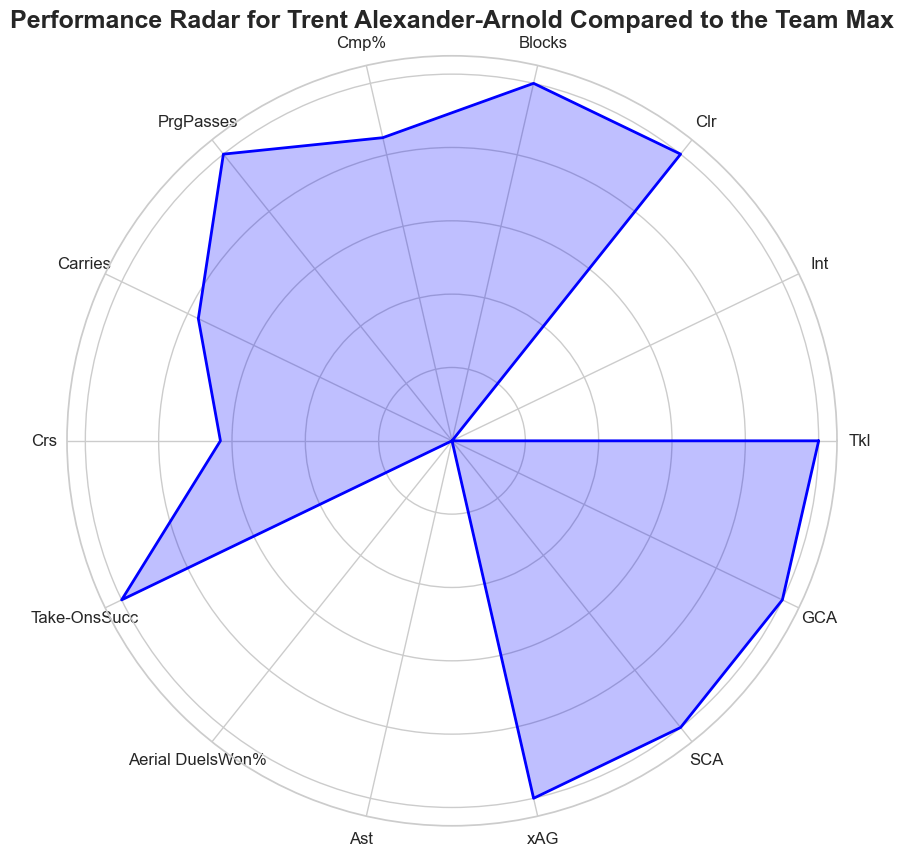

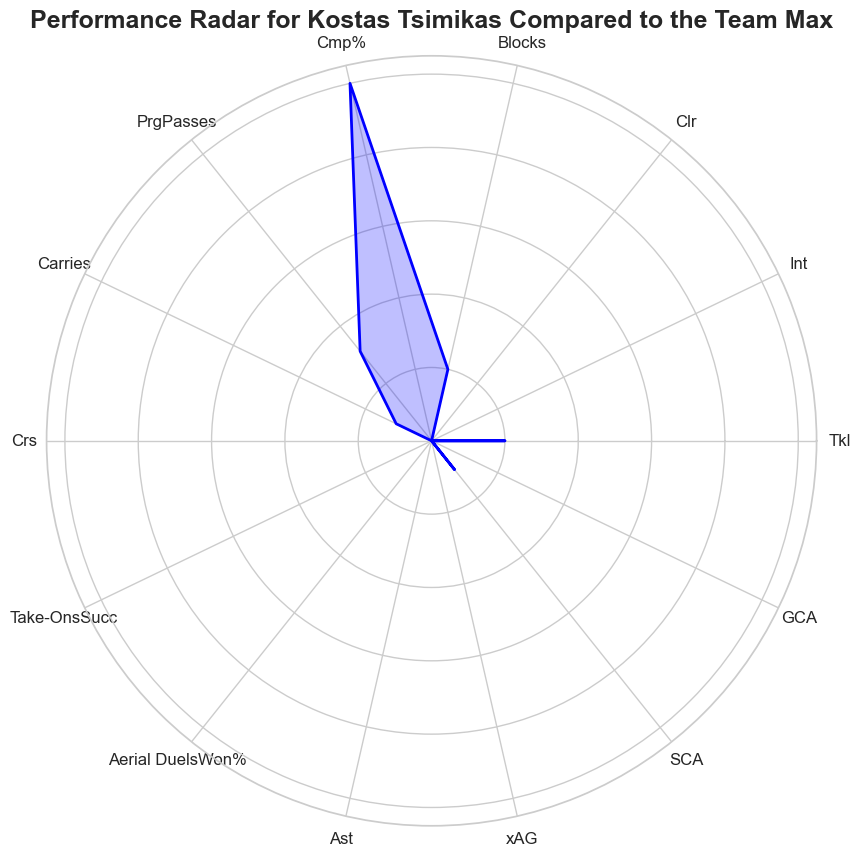

<Figure size 1400x800 with 0 Axes>

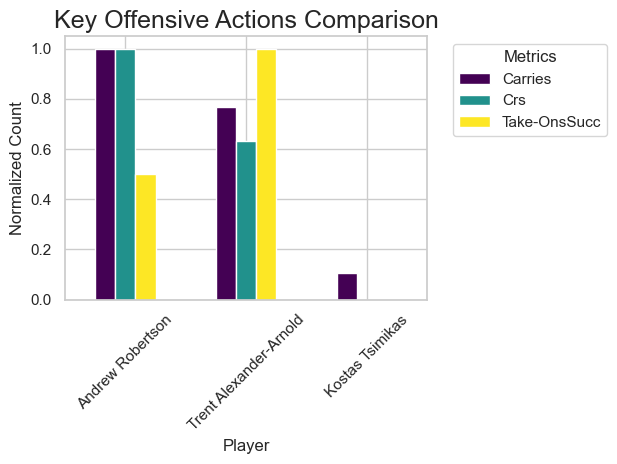

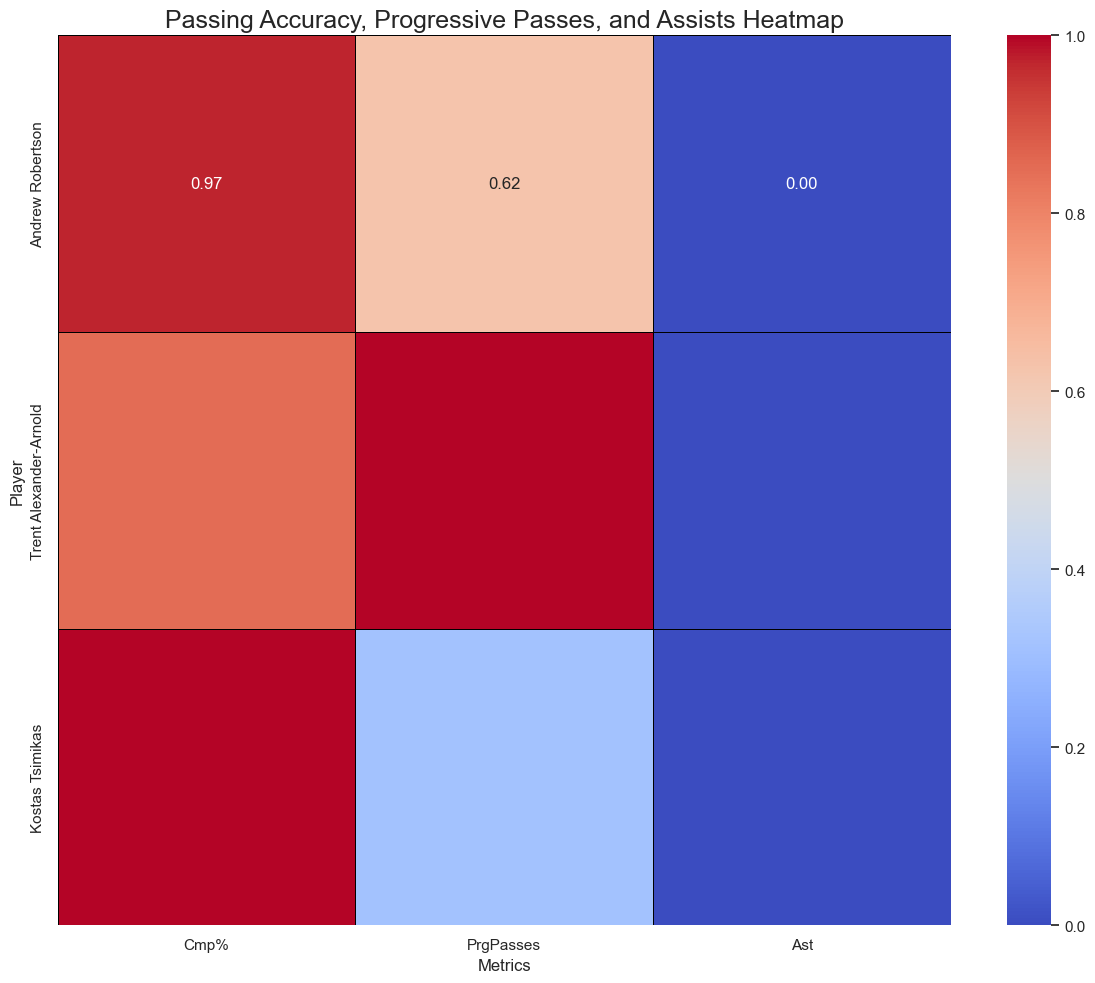

In [86]:
#Full-Backs Analysis

# Define full-back players
full_backs = ['Andrew Robertson', 'Trent Alexander-Arnold', 'Kostas Tsimikas']

# Filter data for full-backs
fb_standard_stats = standard_stats[standard_stats['Player'].isin(full_backs)]
fb_defensive_actions = defensive_actions[defensive_actions['Player'].isin(full_backs)]
fb_passing = passing[passing['Player'].isin(full_backs)]
fb_possession = possession[possession['Player'].isin(full_backs)]
fb_goal_shot_creation = goal_shot_creation[goal_shot_creation['Player'].isin(full_backs)]
fb_misc_stats = misc_stats[misc_stats['Player'].isin(full_backs)]

# Merge data to have all stats in one DataFrame for full-backs
fb_stats = pd.merge(fb_standard_stats, fb_defensive_actions, on='Player', suffixes=('', '_def'))
fb_stats = pd.merge(fb_stats, fb_passing, on='Player', suffixes=('', '_pass'))
fb_stats = pd.merge(fb_stats, fb_possession, on='Player', suffixes=('', '_pos'))
fb_stats = pd.merge(fb_stats, fb_goal_shot_creation, on='Player', suffixes=('', '_gca'))
fb_stats = pd.merge(fb_stats, fb_misc_stats, on='Player', suffixes=('', '_misc'))

# Key metrics to compare for full-backs
fb_metrics = ['Tkl', 'Int', 'Clr', 'Blocks', 'Cmp%', 'PrgPasses', 'Carries', 'Crs', 
              'Take-OnsSucc', 'Aerial DuelsWon%', 'Ast', 'xAG', 'SCA', 'GCA']

print(fb_stats[['Player'] + fb_metrics])

# Normalization on Team's Max
fb_stats_normalized = fb_stats.copy()

# Calculate the maximum value for each metric across all relevant DataFrames
for metric in fb_metrics:
    if metric in fb_stats.columns:
        max_value = fb_stats[metric].max()
        if max_value > 0:  # Avoid division by zero
            fb_stats_normalized[metric] = fb_stats[metric] / max_value
        else:
            fb_stats_normalized[metric] = fb_stats[metric]  # Handle zero max value appropriately
    else:
        print(f"Metric '{metric}' not found in fb_stats columns")


# Radar Chart for Individual Player Analysis using normalized data
def create_radar_chart(player_stats, player_name):
    categories = list(player_stats.index)
    values = player_stats.values.flatten().tolist()
    
    num_vars = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    values += values[:1]  # Complete the loop for radar chart
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12, rotation=45)
    plt.title(f"Performance Radar for {player_name} Compared to the Team Max", size=18, weight='bold')
    plt.show()

# Plot radar chart for each full-back using normalized data
for player in full_backs:
    player_stats = fb_stats_normalized[fb_stats_normalized['Player'] == player][fb_metrics].mean()
    create_radar_chart(player_stats, player)

# Bar Chart to Compare Players in Key Offensive Actions
plt.figure(figsize=(14, 8))
fb_stats_normalized.set_index('Player')[['Carries', 'Crs', 'Take-OnsSucc']].plot(kind='bar', stacked=False, colormap='viridis')
plt.title("Key Offensive Actions Comparison", fontsize=18)
plt.ylabel("Normalized Count")
plt.xlabel("Player")
plt.xticks(rotation=45)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Heatmap of Passing Accuracy, Progressive Passes, and Assists
plt.figure(figsize=(12, 10))
sns.heatmap(fb_stats_normalized.set_index('Player')[['Cmp%', 'PrgPasses', 'Ast']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title("Passing Accuracy, Progressive Passes, and Assists Heatmap", fontsize=18)
plt.xlabel("Metrics")
plt.ylabel("Player")
plt.tight_layout()  # Adjust layout to fit labels
plt.show()





                Player   Cmp%  PrgPasses  Ast  xAG  SCA  GCA  Tkl  Int  \
0  Alexis Mac Allister   86.0       19.0  0.0  0.3   10    2    8    2   
1   Dominik Szoboszlai   91.6       14.0  1.0  0.9   13    1    4    1   
2     Ryan Gravenberch   88.6       15.0  0.0  0.0    3    2    8    7   
3          Wataru Endo  100.0        0.0  0.0  0.0    0    0    0    0   

   Carries  Take-OnsSucc  PrgDist  ShortCmp  MediumCmp  LongCmp  
0       97             1      622        58         57       10  
1      100             1      363        87         44        9  
2      127             3      625        88         61        5  
3        1             0        0         1          0        0  


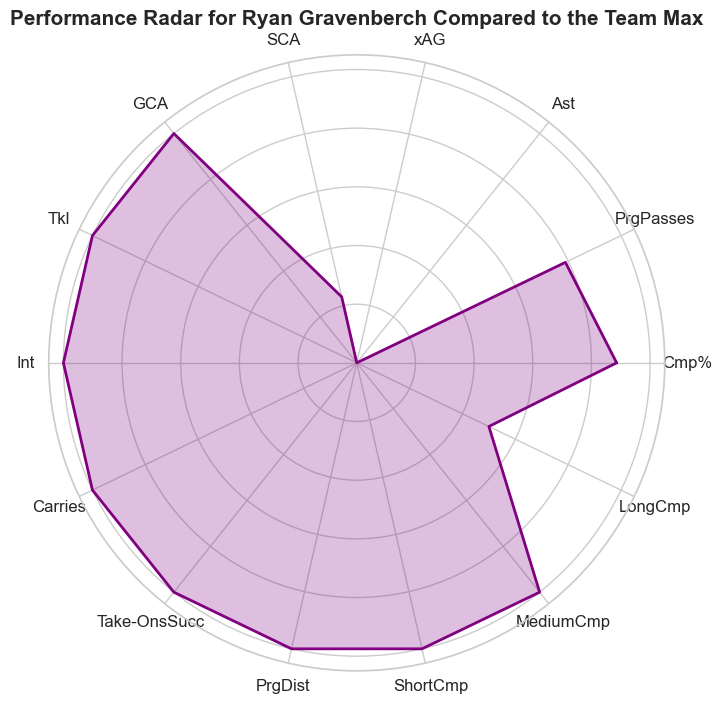

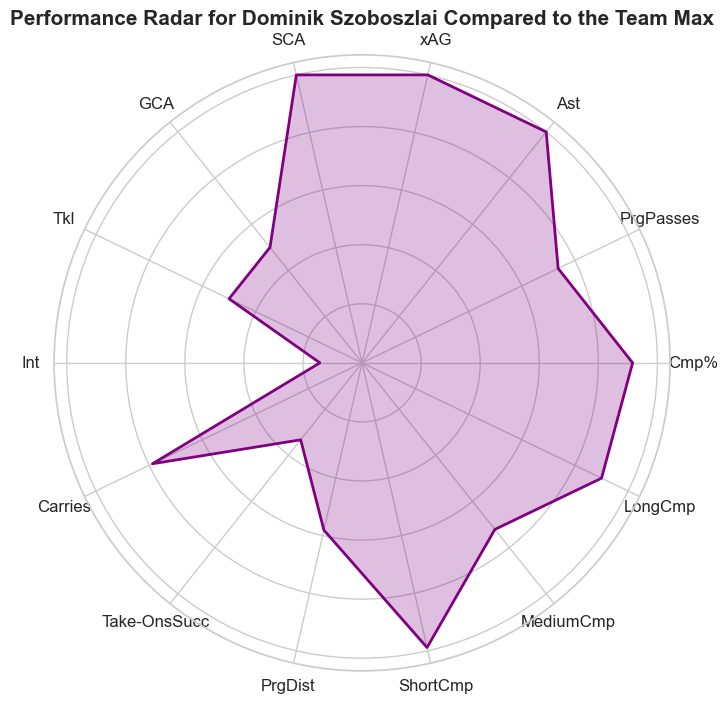

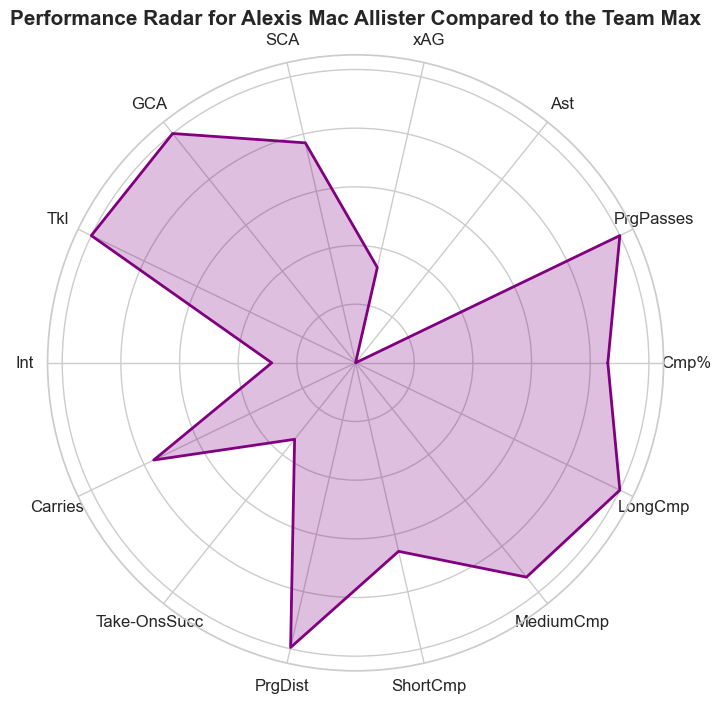

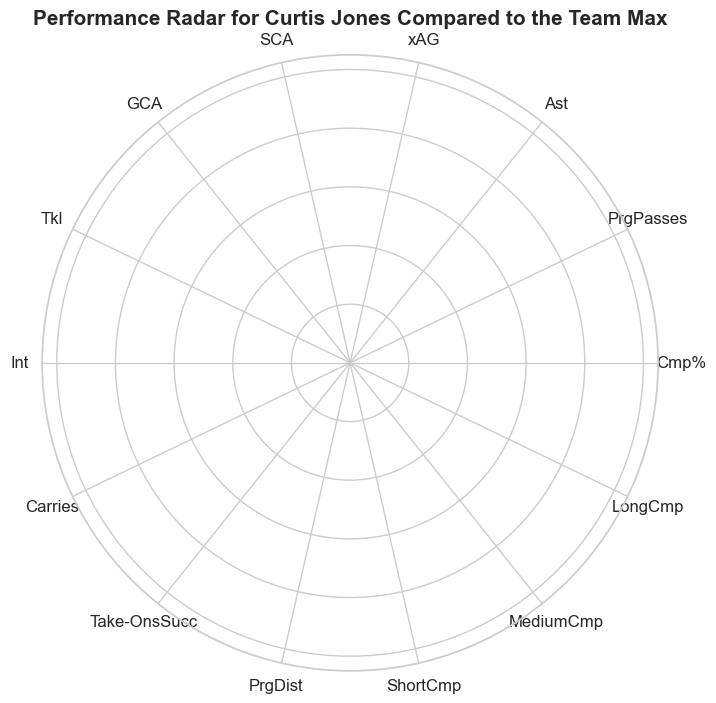

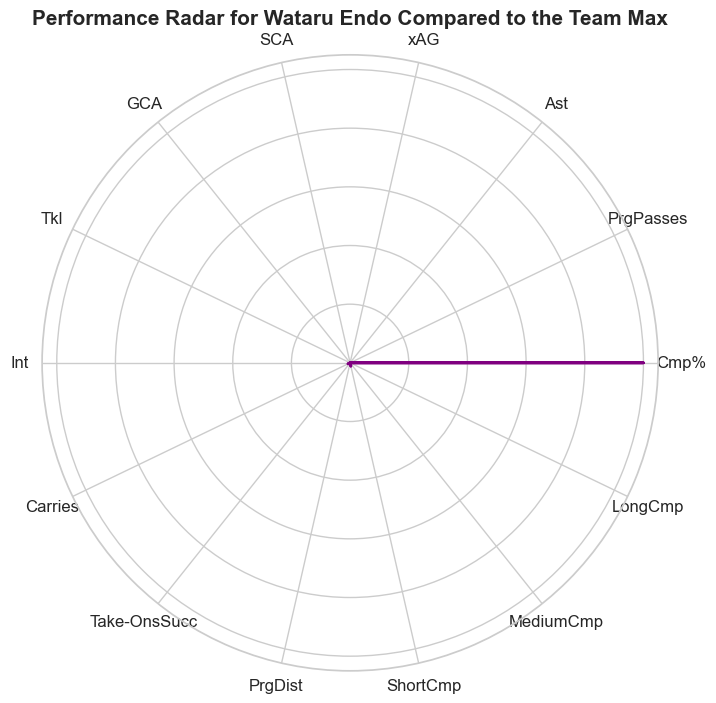

<Figure size 1400x800 with 0 Axes>

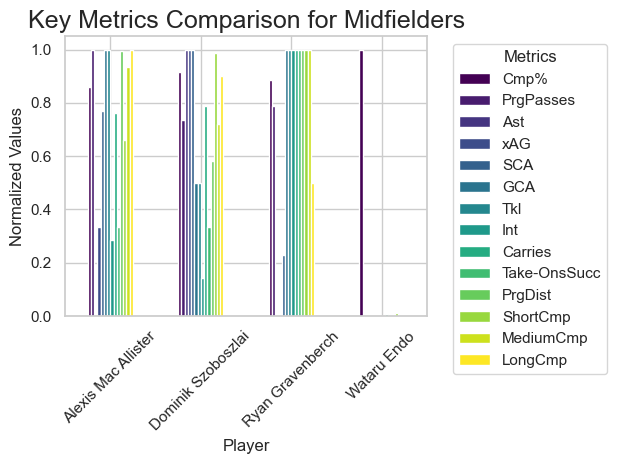

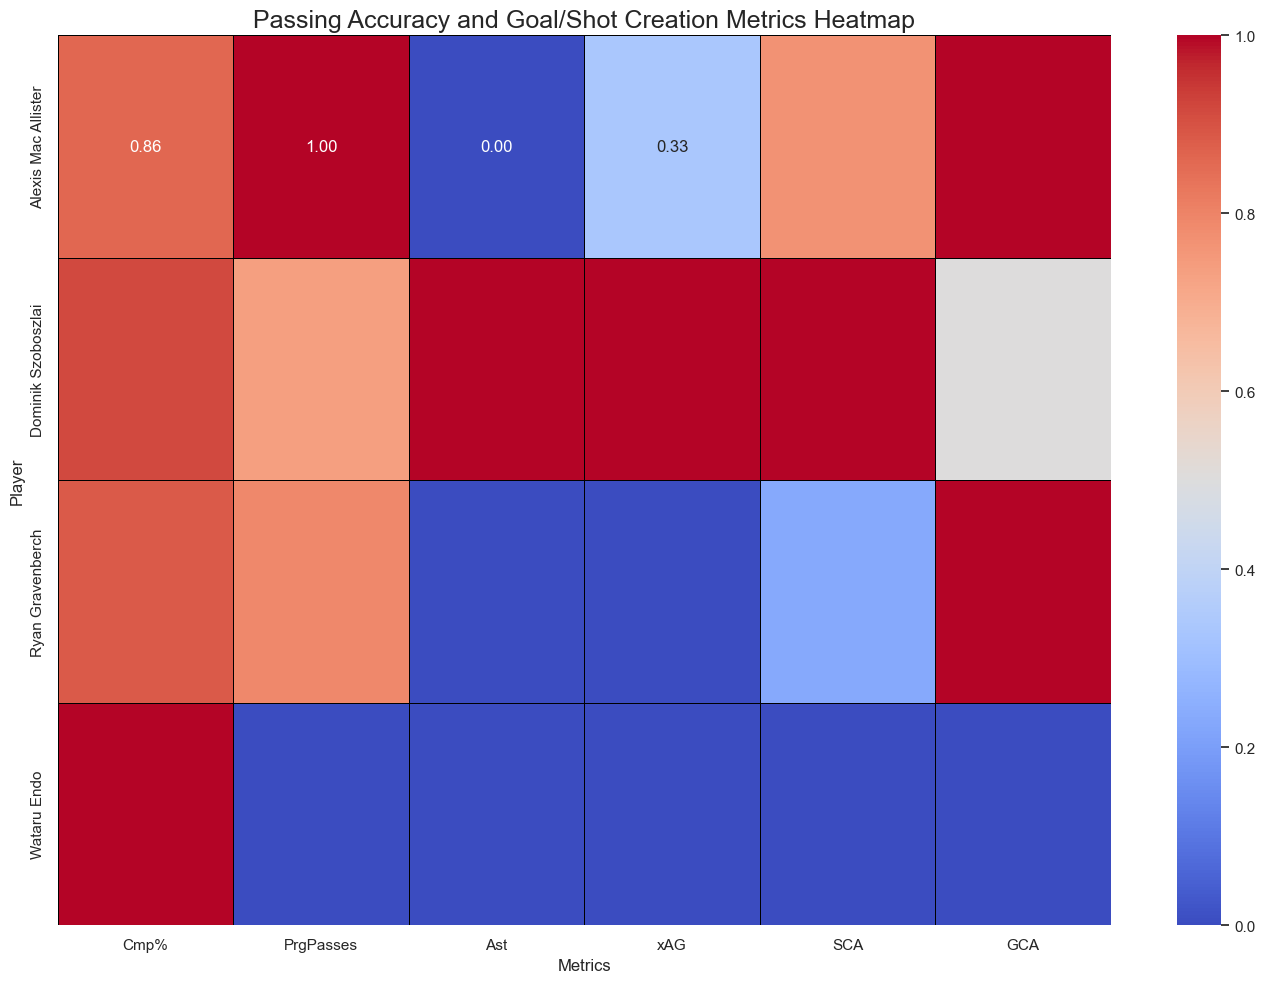

In [87]:
#Midfield Players Analysis

# Define midfield players
midfielders = ['Ryan Gravenberch', 'Dominik Szoboszlai', 'Alexis Mac Allister', 'Curtis Jones', 'Wataru Endo']

# Filter data for midfielders from all relevant tables
mid_standard_stats = standard_stats[standard_stats['Player'].isin(midfielders)]
mid_defensive_actions = defensive_actions[defensive_actions['Player'].isin(midfielders)]
mid_passing = passing[passing['Player'].isin(midfielders)]
mid_possession = possession[possession['Player'].isin(midfielders)]
mid_goal_shot_creation = goal_shot_creation[goal_shot_creation['Player'].isin(midfielders)]
mid_misc_stats = misc_stats[misc_stats['Player'].isin(midfielders)]

# Merge data to have all stats in one DataFrame for midfielders
mid_stats = pd.merge(mid_standard_stats, mid_defensive_actions, on='Player', suffixes=('', '_def'))
mid_stats = pd.merge(mid_stats, mid_passing, on='Player', suffixes=('', '_pass'))
mid_stats = pd.merge(mid_stats, mid_possession, on='Player', suffixes=('', '_pos'))
mid_stats = pd.merge(mid_stats, mid_goal_shot_creation, on='Player', suffixes=('', '_gca'))
mid_stats = pd.merge(mid_stats, mid_misc_stats, on='Player', suffixes=('', '_misc'))

# Key metrics to compare for midfielders
mid_metrics = [
    'Cmp%', 'PrgPasses', 'Ast', 'xAG', 'SCA', 'GCA', 'Tkl', 'Int', 'Carries',
    'Take-OnsSucc', 'PrgDist', 'ShortCmp', 'MediumCmp', 'LongCmp'
]

print(mid_stats[['Player'] + mid_metrics])

# Create a copy of the merged DataFrame for normalization
mid_stats_normalized = mid_stats.copy()

# Calculate the maximum value for each metric across all relevant DataFrames
for metric in mid_metrics:
    if metric in mid_stats.columns:
        max_value = mid_stats[metric].max()
        if max_value > 0:  # Avoid division by zero
            mid_stats_normalized[metric] = mid_stats[metric] / max_value
        else:
            mid_stats_normalized[metric] = mid_stats[metric]  # Handle zero max value appropriately
    else:
        print(f"Metric '{metric}' not found in mid_stats columns")


# Radar Chart for Individual Player Analysis using normalized data
def create_radar_chart(player_stats, player_name):
    categories = list(player_stats.index)
    values = player_stats.values.flatten().tolist()
    values += values[:1]  # Complete the loop for radar chart

    # Fix for category mismatch issue
    if len(categories) + 1 != len(values):
        values = values[:len(categories)] + [values[0]]
    
    num_vars = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop for radar chart

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='purple', alpha=0.25)
    ax.plot(angles, values, color='purple', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12, rotation=45)
    plt.title(f"Performance Radar for {player_name} Compared to the Team Max", size=15, weight='bold')
    plt.show()

# Plot radar chart for each midfielder using normalized data
for player in midfielders:
    player_stats = mid_stats_normalized[mid_stats_normalized['Player'] == player][mid_metrics].mean()
    create_radar_chart(player_stats, player)

# Bar Chart to Compare Key Metrics for Midfielders
plt.figure(figsize=(14, 8))
mid_stats_normalized.set_index('Player')[mid_metrics].plot(kind='bar', stacked=False, colormap='viridis')
plt.title("Key Metrics Comparison for Midfielders", fontsize=18)
plt.ylabel("Normalized Values")
plt.xlabel("Player")
plt.xticks(rotation=45)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# Heatmap of Key Metrics
plt.figure(figsize=(14, 10))
sns.heatmap(mid_stats_normalized.set_index('Player')[['Cmp%', 'PrgPasses', 'Ast', 'xAG', 'SCA', 'GCA']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title("Passing Accuracy and Goal/Shot Creation Metrics Heatmap", fontsize=18)
plt.xlabel("Metrics")
plt.ylabel("Player")
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


          Player  Gls  Ast   xG  npxG  xAG  SCA  GCA  Cmp%  TotDist  PrgDist  \
0  Mohamed Salah  3.0  3.0  1.8   1.8  1.4   13    3  78.8     1296      373   
1      Luis Díaz  3.0  1.0  1.8   1.8  1.0   15    2  85.2     1041      257   
2     Diogo Jota  1.0  1.0  1.6   1.6  0.7    4    1  70.7      465      124   
3     Cody Gakpo  0.0  0.0  0.4   0.4  0.0    1    0  72.7      189       31   
4   Darwin Núñez  0.0  0.0  0.1   0.1  0.0    1    0  92.3      157       28   

   ShortCmp  MediumCmp  LongCmp  
0        47         28        7  
1        40         18        7  
2        13         10        3  
3        10          6        0  
4         8          2        1  


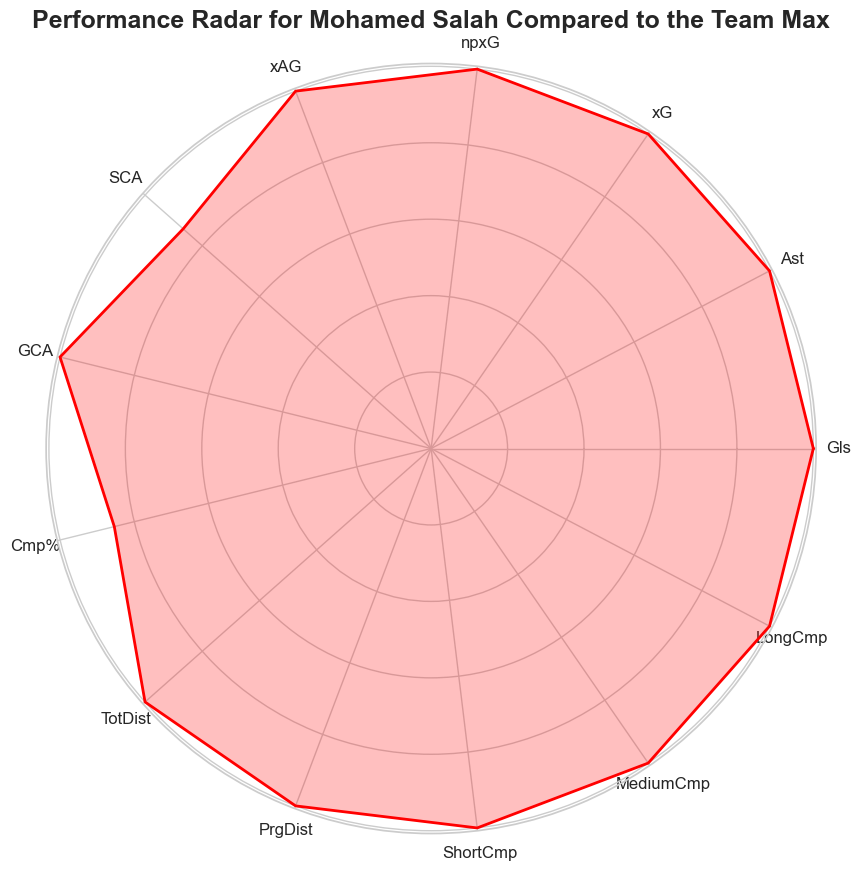

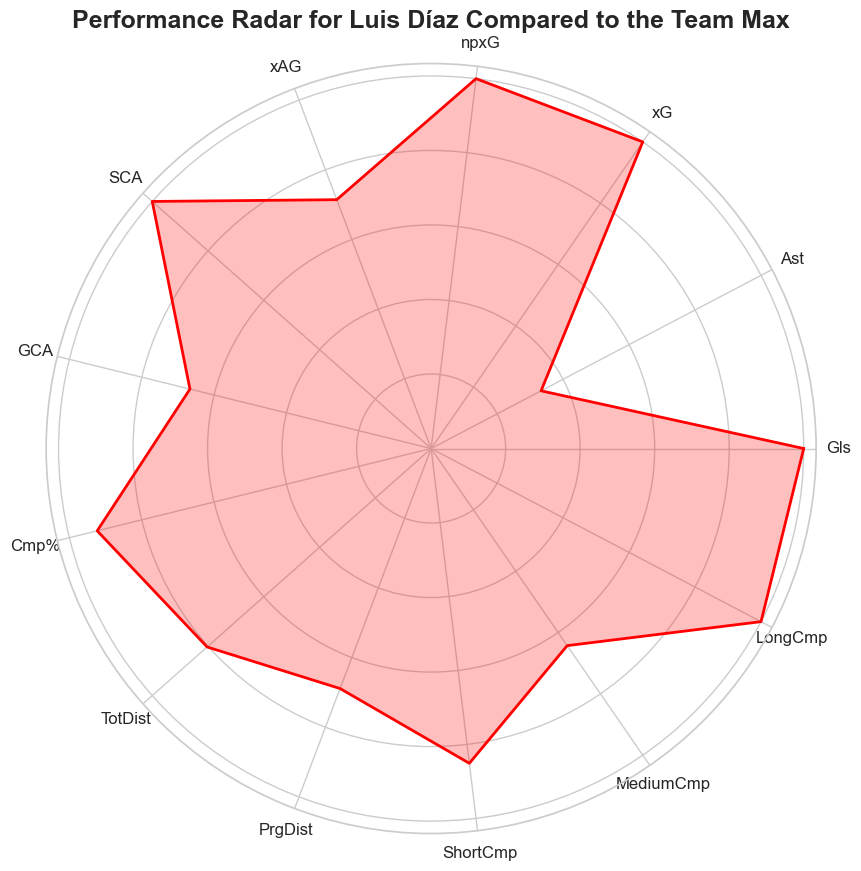

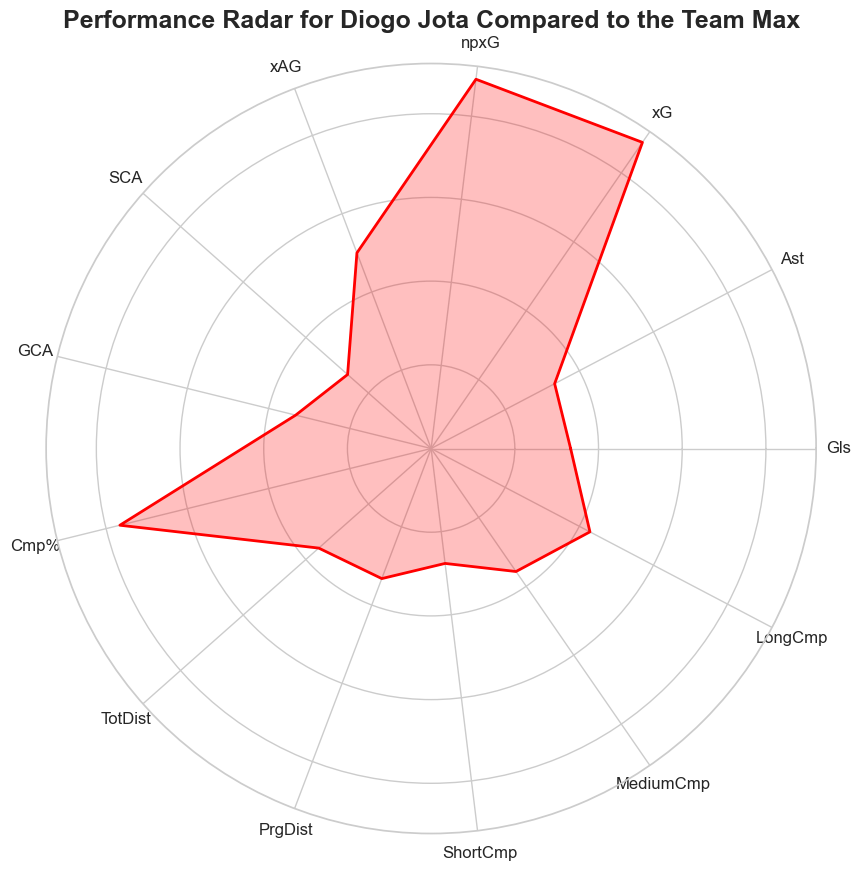

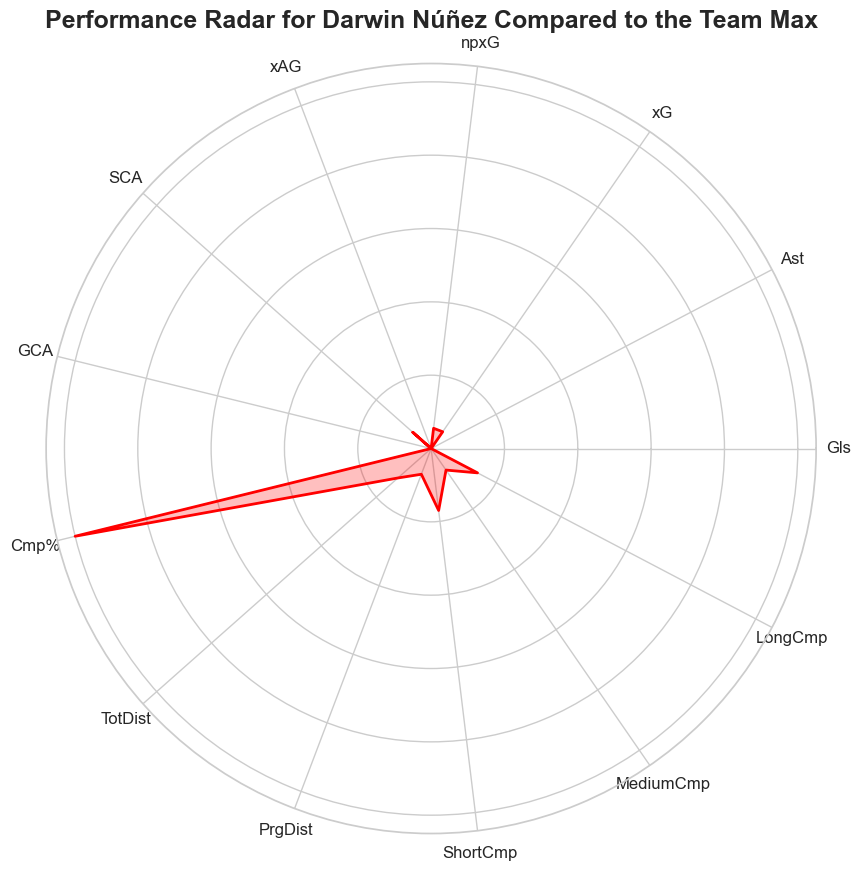

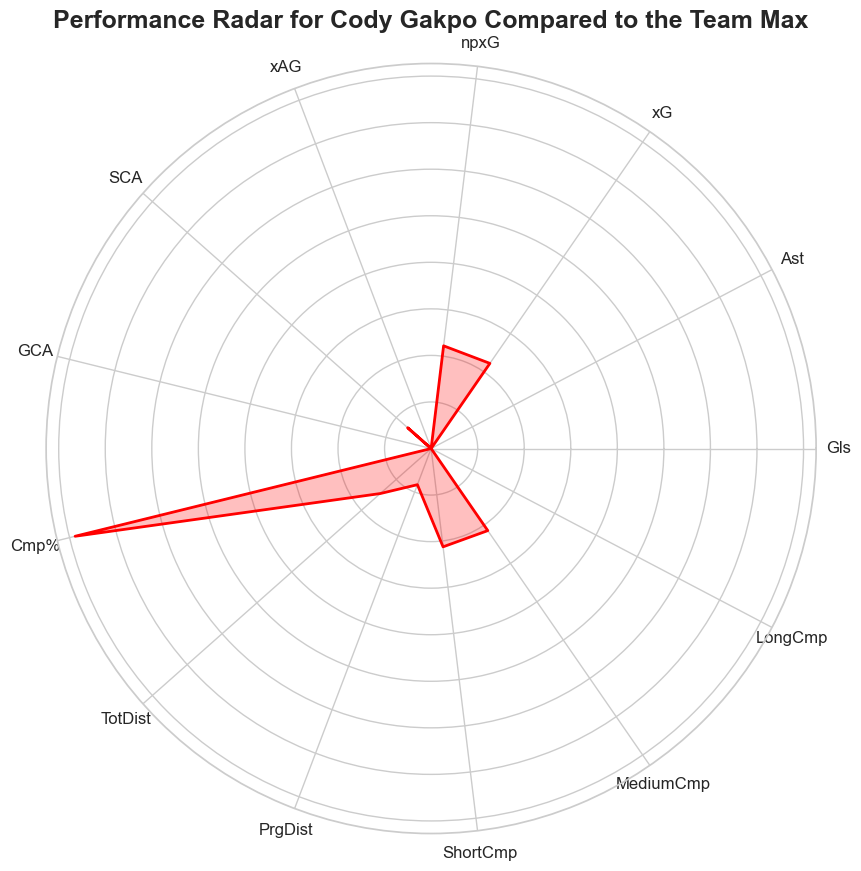

<Figure size 1400x800 with 0 Axes>

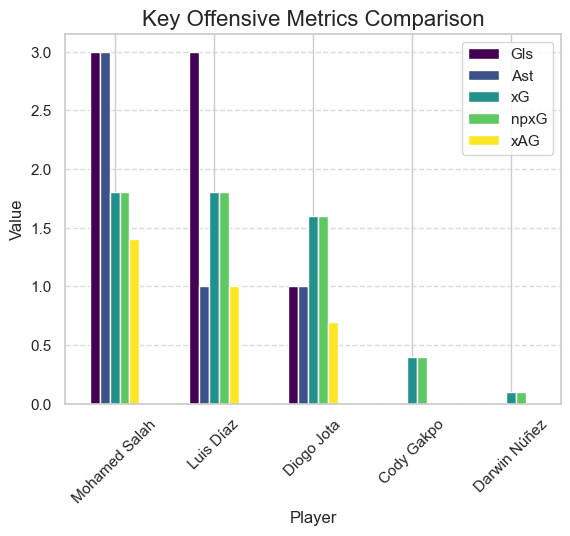

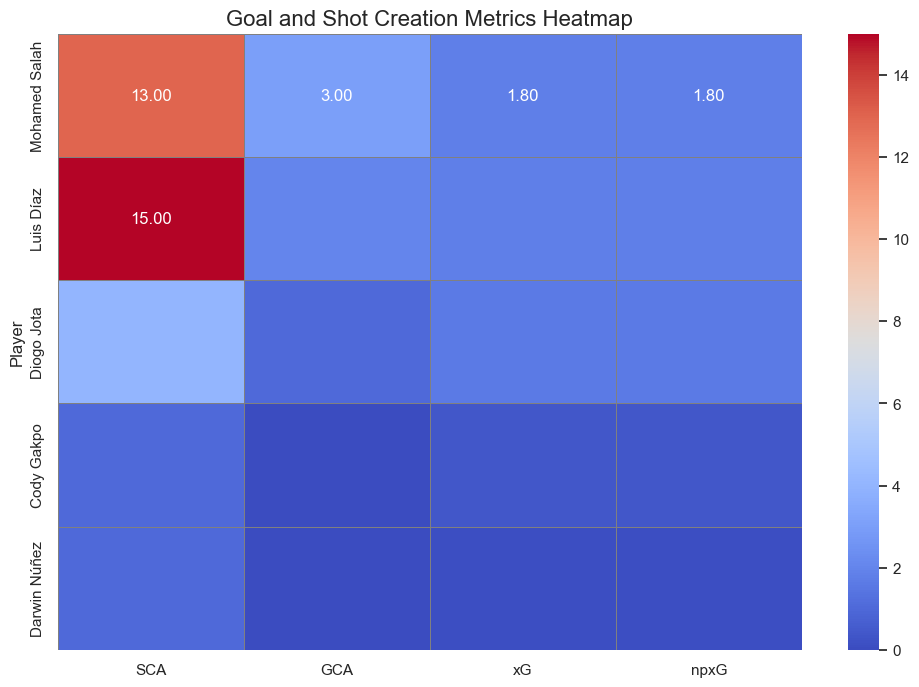

In [88]:
#Attacking Players Analysis

# Define attacking players
attackers = ['Mohamed Salah', 'Luis Díaz', 'Diogo Jota', 'Darwin Núñez', 'Cody Gakpo']

# Filter data for attackers
atk_standard_stats = standard_stats[standard_stats['Player'].isin(attackers)]
atk_shooting = shooting[shooting['Player'].isin(attackers)]
atk_passing = passing[passing['Player'].isin(attackers)]
atk_goal_shot_creation = goal_shot_creation[goal_shot_creation['Player'].isin(attackers)]
atk_misc_stats = misc_stats[misc_stats['Player'].isin(attackers)]

# Merge data to have all stats in one DataFrame for attackers
atk_stats = pd.merge(atk_standard_stats, atk_shooting, on='Player', suffixes=('', '_sh'))
atk_stats = pd.merge(atk_stats, atk_passing, on='Player', suffixes=('', '_pass'))
atk_stats = pd.merge(atk_stats, atk_goal_shot_creation, on='Player', suffixes=('', '_gca'))
atk_stats = pd.merge(atk_stats, atk_misc_stats, on='Player', suffixes=('', '_misc'))

# Key metrics to compare for attackers
atk_metrics = ['Gls', 'Ast', 'xG', 'npxG', 'xAG', 'SCA', 'GCA', 'Cmp%', 'TotDist', 'PrgDist', 'ShortCmp', 'MediumCmp', 'LongCmp']

print(atk_stats[['Player'] + atk_metrics])

# Normalize metrics based on the maximum value across all relevant DataFrames
atk_stats_normalized = atk_stats.copy()
for metric in atk_metrics:
    if metric in atk_stats.columns:
        max_value = atk_stats[metric].max()
        if max_value > 0:
            atk_stats_normalized[metric] = atk_stats[metric] / max_value
        else:
            atk_stats_normalized[metric] = atk_stats[metric]
    else:
        print(f"Metric {metric} not found in atk_stats columns")


# Radar Chart for Individual Player Analysis
def create_radar_chart(player_stats, player_name):
    categories = list(player_stats.index)
    values = player_stats.values.flatten().tolist()
    
    num_vars = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    values += values[:1]  # Complete the loop for radar chart
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='red', alpha=0.25)
    ax.plot(angles, values, color='red', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12, rotation=45)
    plt.title(f"Performance Radar for {player_name} Compared to the Team Max", size=18, weight='bold')
    plt.show()

# Plot radar chart for each attacker using normalized data
for player in attackers:
    player_stats = atk_stats_normalized[atk_stats_normalized['Player'] == player][atk_metrics].mean()
    create_radar_chart(player_stats, player)

# Bar Chart to Compare Players in Key Offensive Metrics
plt.figure(figsize=(14, 8))
atk_stats.set_index('Player')[['Gls', 'Ast', 'xG', 'npxG', 'xAG']].plot(kind='bar', stacked=False, colormap='viridis')
plt.title("Key Offensive Metrics Comparison", fontsize=16)
plt.ylabel("Value")
plt.xlabel("Player")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Heatmap of Goal and Shot Creation Metrics
plt.figure(figsize=(12, 8))
sns.heatmap(atk_stats.set_index('Player')[['SCA', 'GCA', 'xG', 'npxG']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='gray')
plt.title("Goal and Shot Creation Metrics Heatmap", fontsize=16)
plt.show()



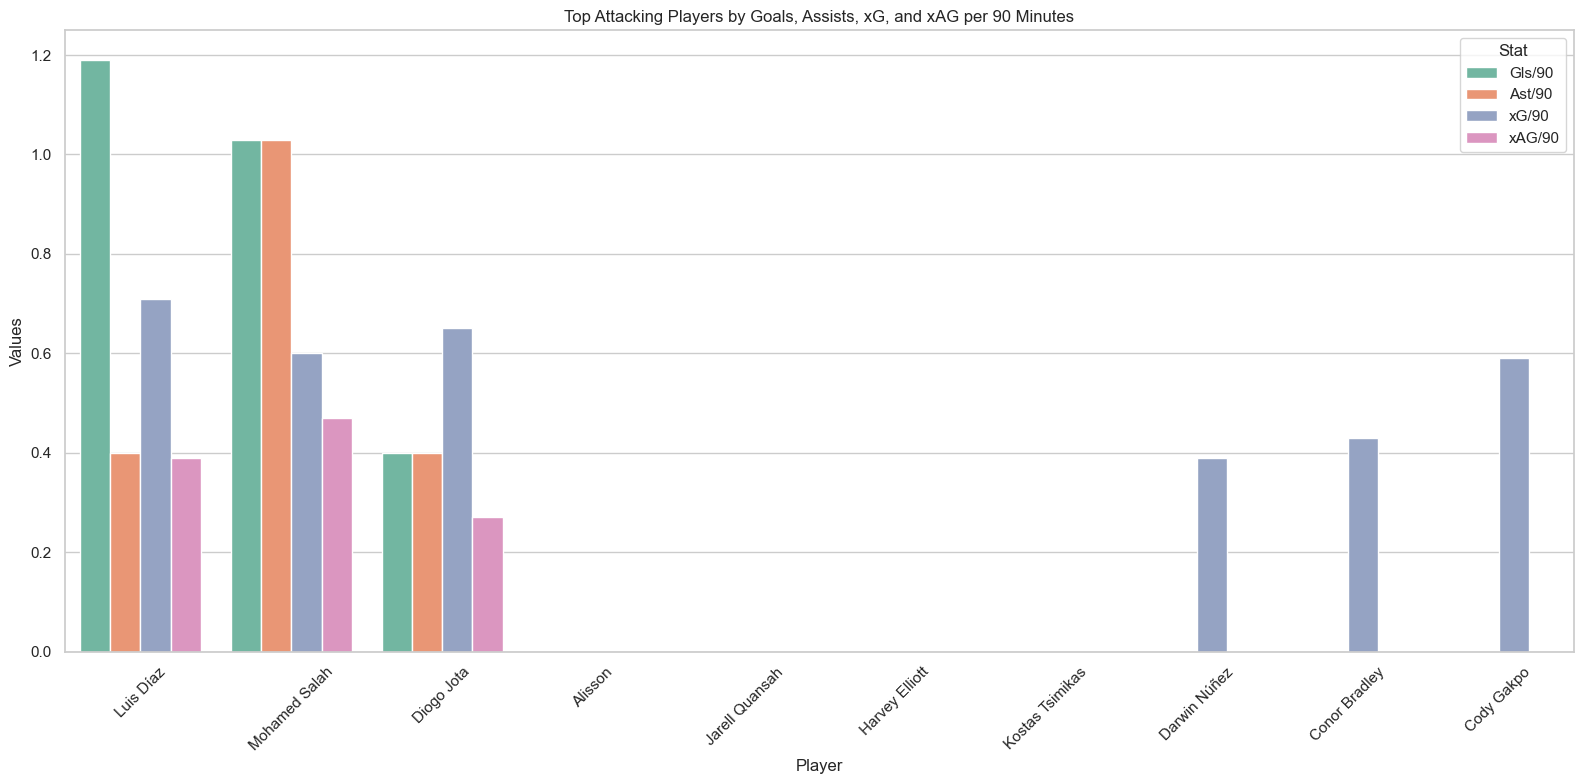

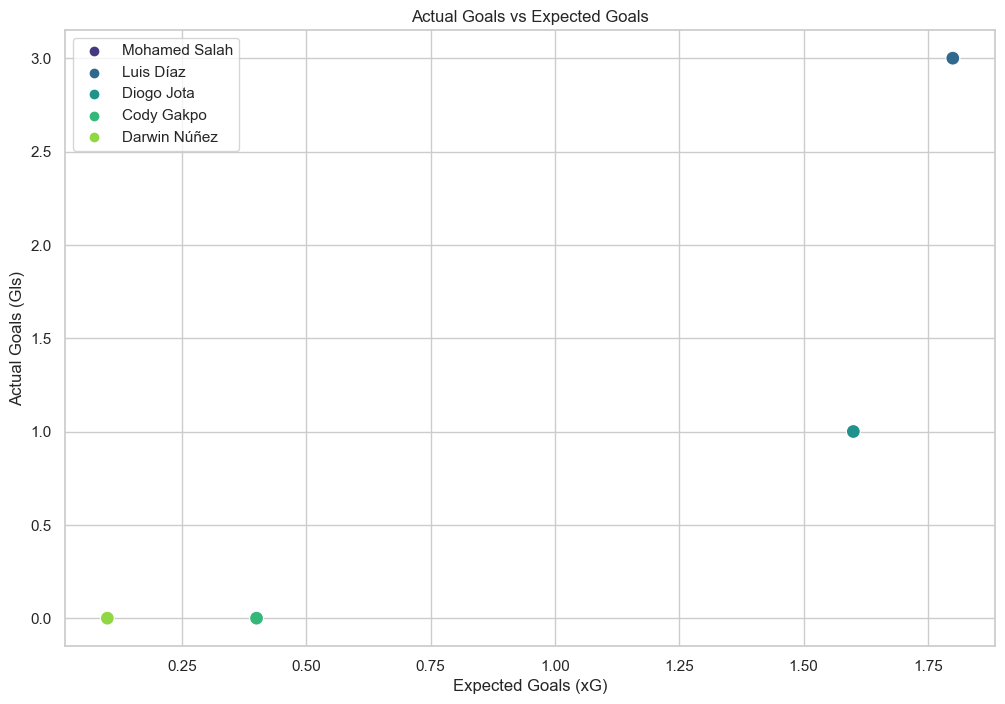

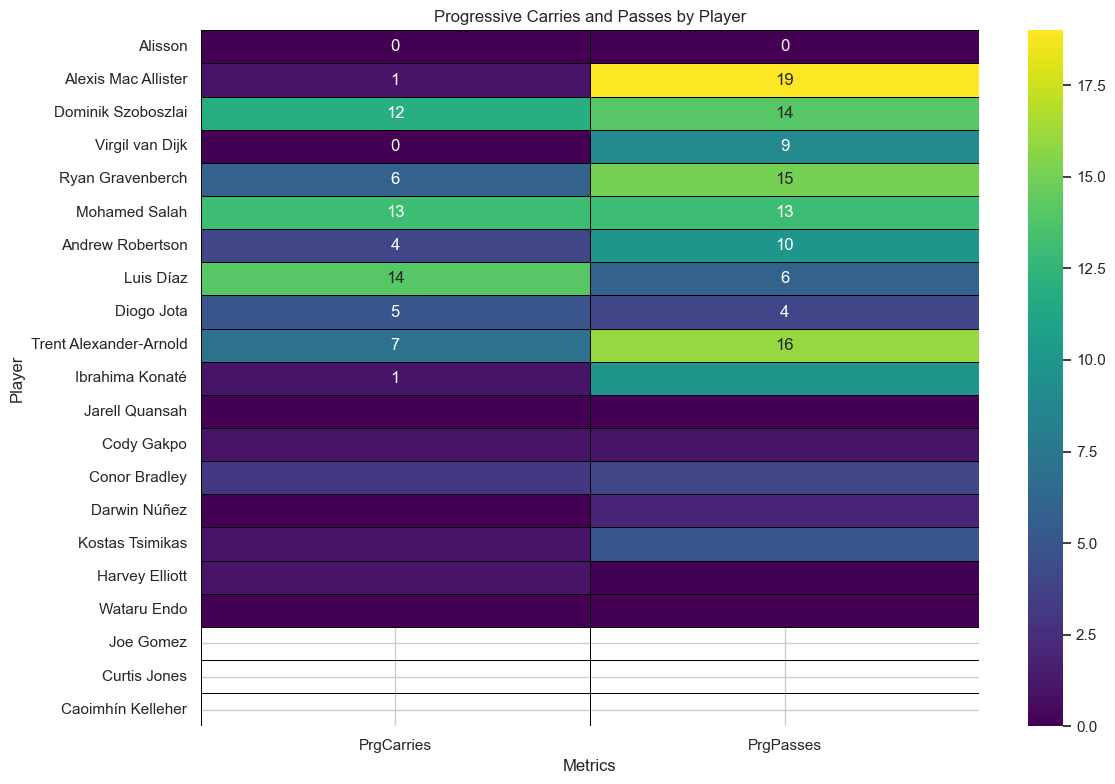

In [81]:
#Analysis of Attacking Strategies and Dynamics
# Top Attacking Players
top_players = standard_stats[['Player', 'Gls/90', 'Ast/90', 'xG/90', 'xAG/90']].sort_values(by='Gls/90', ascending=False).head(10)

# Melt the dataframe to have a long format suitable for seaborn
melted_top_players = top_players.melt(id_vars='Player', var_name='Stat', value_name='Value')

# Plot
plt.figure(figsize=(16, 8))
sns.barplot(x='Player', y='Value', hue='Stat', data=melted_top_players, palette='Set2')

plt.title('Top Attacking Players by Goals, Assists, xG, and xAG per 90 Minutes')
plt.xlabel('Player')
plt.ylabel('Values')
plt.legend(title='Stat')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plot for goals vs. expected goals
plt.figure(figsize=(12, 8))
sns.scatterplot(x='xG', y='Gls', data=top_contributors, hue='Player', palette='viridis', s=100)
plt.title("Actual Goals vs Expected Goals")
plt.xlabel("Expected Goals (xG)")
plt.ylabel("Actual Goals (Gls)")
plt.legend(loc='best')
plt.show()

# Progressive Play
progressive_play = standard_stats[['Player', 'PrgCarries', 'PrgPasses']]
progressive_play.set_index('Player', inplace=True)
plt.figure(figsize=(12, 8))


# Heatmap with better color scheme and annotations
sns.heatmap(progressive_play, annot=True, cmap='viridis', fmt='g', linewidths=0.5, linecolor='black')
plt.title('Progressive Carries and Passes by Player')
plt.xlabel('Metrics')
plt.ylabel('Player')
plt.tight_layout()
plt.show()


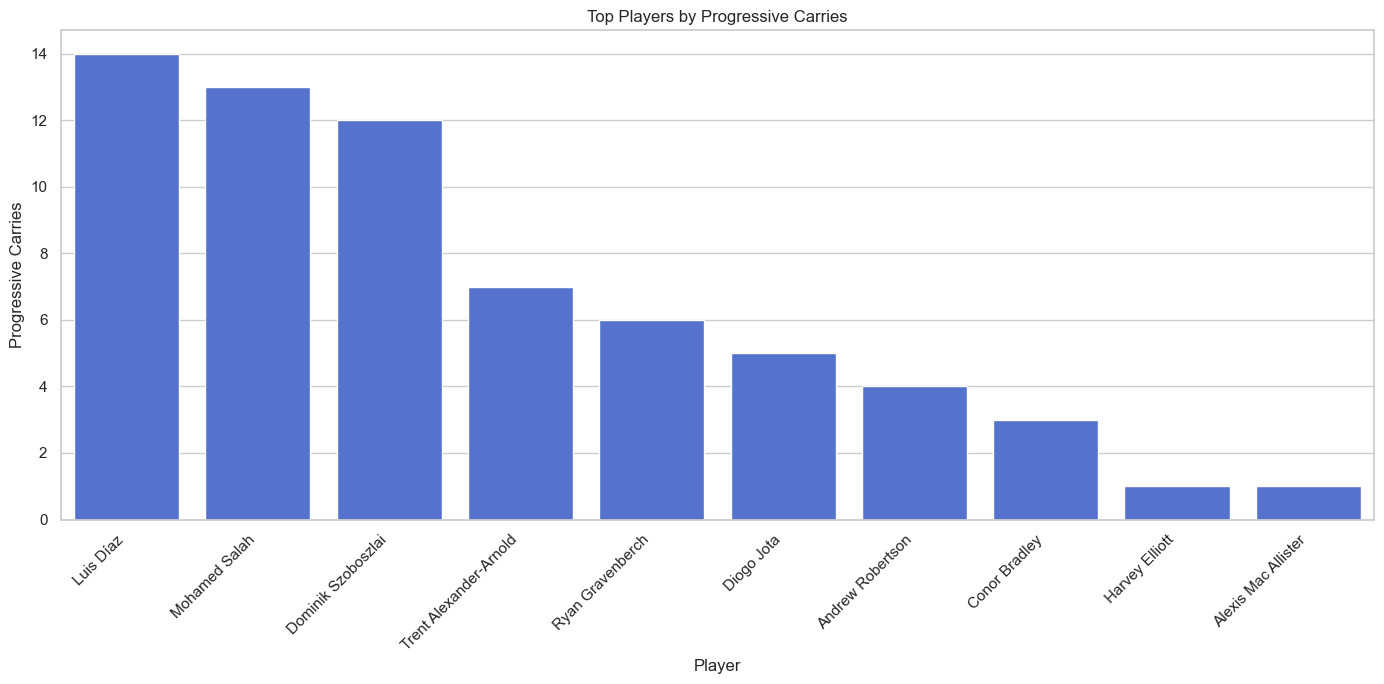

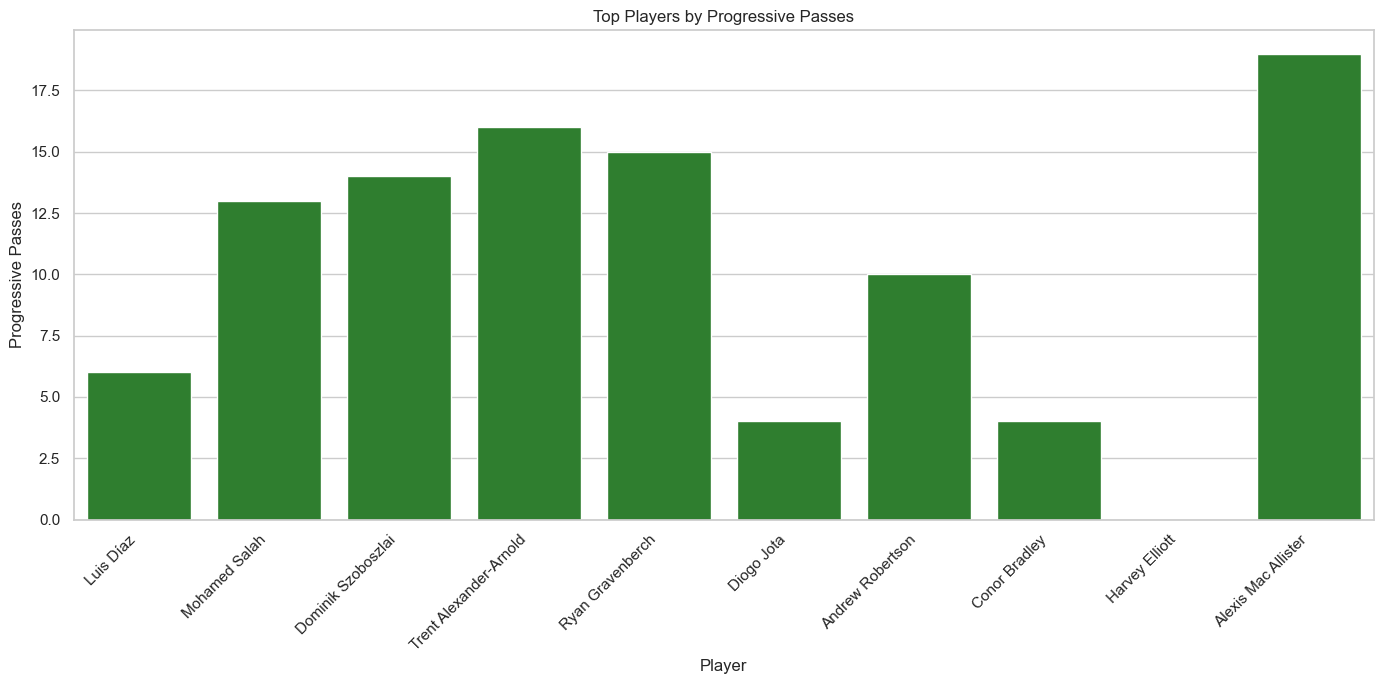

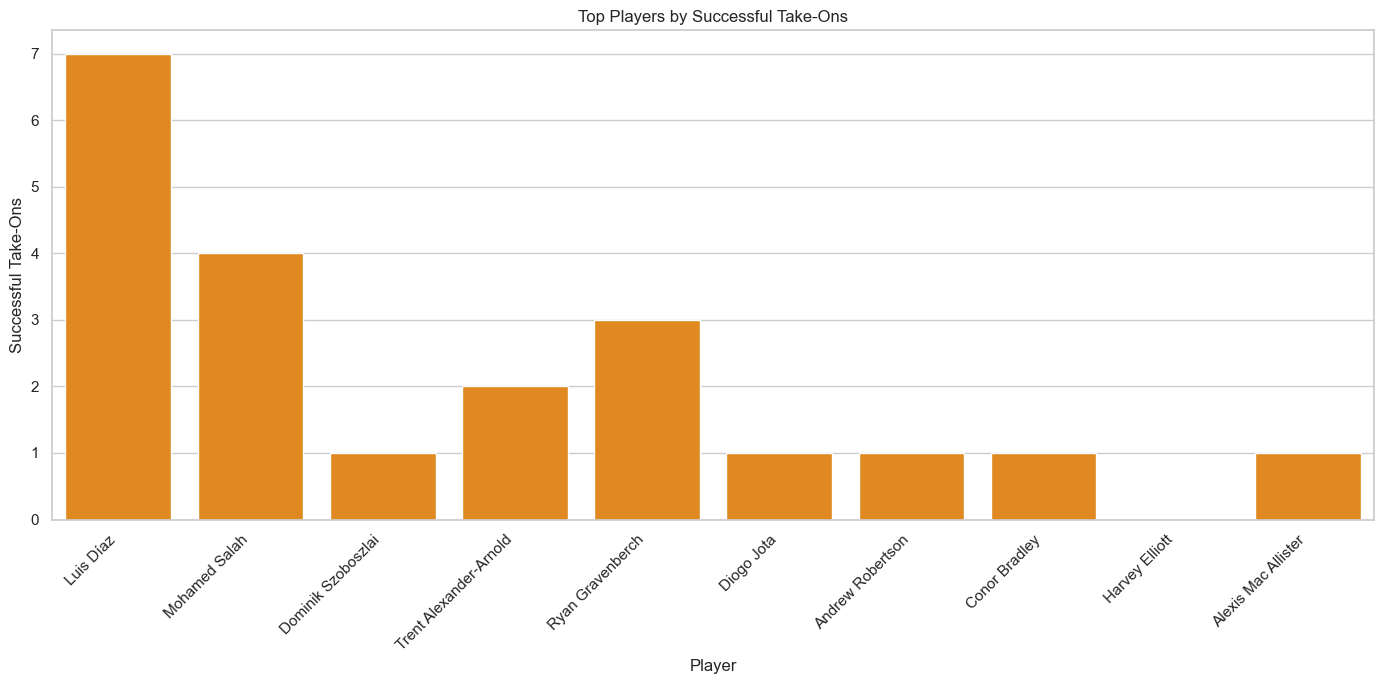

In [85]:
#Evaluation of the Team’s Ability to Transition Quickly and Create Dangerous Attacks
# Merge datasets on 'Player' 
transition_data = pd.merge(possession, standard_stats, on='Player', how='inner')

# Identify top players by Progressive Carries
top_transition_players = transition_data[['Player', 'PrgCarries', 'PrgPasses', 'Take-OnsSucc']]
top_transition_players = top_transition_players.sort_values(by='PrgCarries', ascending=False).head(10)

# Plot Progressive Carries
plt.figure(figsize=(14, 7))
sns.barplot(x='Player', y='PrgCarries', data=top_transition_players, color='royalblue')
plt.title('Top Players by Progressive Carries')
plt.xlabel('Player')
plt.ylabel('Progressive Carries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Progressive Passes
plt.figure(figsize=(14, 7))
sns.barplot(x='Player', y='PrgPasses', data=top_transition_players, color='forestgreen')
plt.title('Top Players by Progressive Passes')
plt.xlabel('Player')
plt.ylabel('Progressive Passes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Successful Take-Ons
plt.figure(figsize=(14, 7))
sns.barplot(x='Player', y='Take-OnsSucc', data=top_transition_players, color='darkorange')
plt.title('Top Players by Successful Take-Ons')
plt.xlabel('Player')
plt.ylabel('Successful Take-Ons')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
